In [3]:
import PySAM.TcsmoltenSalt as TCSMS
import pandas as pd

# Crear listas para almacenar los resultados
storage_hours = list(range(4, 19))  # Valores de almacenamiento de 4 a 18 horas
energy_generation = []
plant_costs = []

# Loop sobre diferentes valores de horas de almacenamiento
for tshours in storage_hours:
    # Crear una nueva instancia del modelo TcsmoltenSalt
    csp_model = TCSMS.default("MSPTSingleOwner")

    # Configuración de los recursos solares
    solar_resource_data = {
        "solar_resource_file": "/home/cparrado/UNAB/csp2/hourly_data_fixed.csv"
    }

    # Asignar el recurso solar al modelo
    csp_model.SolarResource.assign(solar_resource_data)

    # Configurar horas de almacenamiento térmico
    system_design_data = {
        "tshours": tshours  # Establecer el valor de las horas de almacenamiento
    }

    # Asignar el valor al modelo
    csp_model.SystemDesign.assign(system_design_data)

    # Ejecutar la simulación
    try:
        csp_model.execute()
        print(f"Simulación con {tshours} horas de almacenamiento ejecutada con éxito")
        
        # Guardar los resultados de generación de energía y costo
        energy_generation.append(csp_model.Outputs.annual_energy)
        plant_costs.append(csp_model.Outputs.total_installed_cost)

    except Exception as e:
        print(f"Error al ejecutar la simulación con {tshours} horas de almacenamiento: {e}")
        energy_generation.append(None)
        plant_costs.append(None)

# Crear un DataFrame para los resultados
df_results = pd.DataFrame({
    'Horas_almacenamiento': storage_hours,
    'Generacion_energia_kWh': energy_generation,
    'Costo_total_planta_$': plant_costs
})

# Guardar los resultados en un archivo CSV
output_csv = "/home/cparrado/UNAB/csp2/resultados_simulacion.csv"
df_results.to_csv(output_csv, index=False)

print(f"Resultados guardados en {output_csv}")


Simulación con 4 horas de almacenamiento ejecutada con éxito
Simulación con 5 horas de almacenamiento ejecutada con éxito
Simulación con 6 horas de almacenamiento ejecutada con éxito
Simulación con 7 horas de almacenamiento ejecutada con éxito
Simulación con 8 horas de almacenamiento ejecutada con éxito
Simulación con 9 horas de almacenamiento ejecutada con éxito
Simulación con 10 horas de almacenamiento ejecutada con éxito
Simulación con 11 horas de almacenamiento ejecutada con éxito
Simulación con 12 horas de almacenamiento ejecutada con éxito
Simulación con 13 horas de almacenamiento ejecutada con éxito
Simulación con 14 horas de almacenamiento ejecutada con éxito
Simulación con 15 horas de almacenamiento ejecutada con éxito
Simulación con 16 horas de almacenamiento ejecutada con éxito
Simulación con 17 horas de almacenamiento ejecutada con éxito
Simulación con 18 horas de almacenamiento ejecutada con éxito
Resultados guardados en /home/cparrado/UNAB/csp2/resultados_simulacion.csv


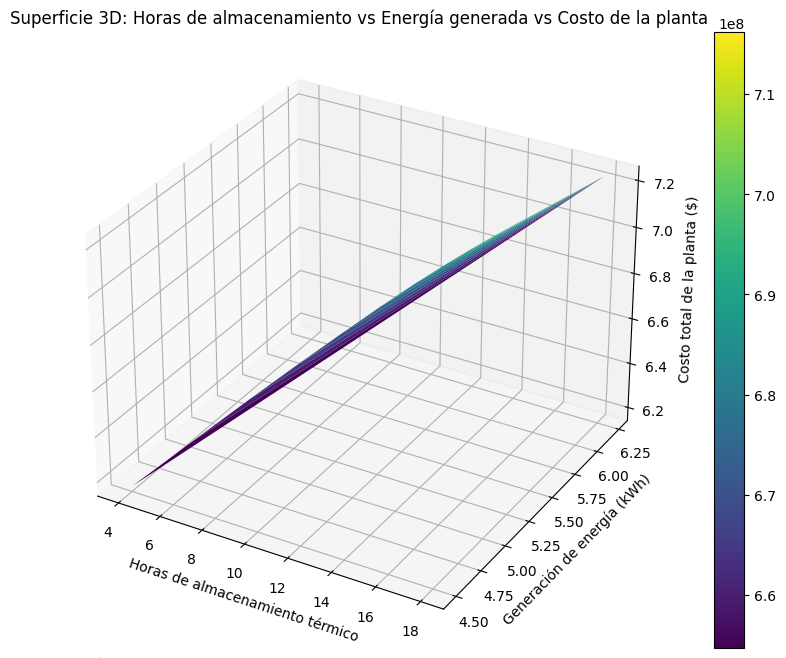

Gráfico 3D de superficie guardado en /home/cparrado/UNAB/csp2/surface_3d_energia_costo.png


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar los resultados del CSV
input_csv = "/home/cparrado/UNAB/csp2/resultados_simulacion.csv"
df = pd.read_csv(input_csv)

# Extraer las columnas necesarias
X = df['Horas_almacenamiento'].values
Y = df['Generacion_energia_kWh'].values
Z = df['Costo_total_planta_$'].values

# Crear el gráfico de superficie 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico de dispersión 3D
surface = ax.plot_trisurf(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('Horas de almacenamiento térmico')
ax.set_ylabel('Generación de energía (kWh)')
ax.set_zlabel('Costo total de la planta ($)')

# Título del gráfico
ax.set_title('Superficie 3D: Horas de almacenamiento vs Energía generada vs Costo de la planta')

# Añadir barra de colores
fig.colorbar(surface)

# Guardar gráfico 3D como PNG
output_file_3d_surface = "/home/cparrado/UNAB/csp2/surface_3d_energia_costo.png"
plt.savefig(output_file_3d_surface)

# Mostrar el gráfico
plt.show()

print(f"Gráfico 3D de superficie guardado en {output_file_3d_surface}")



In [6]:
import PySAM.TcsmoltenSalt as TCSMS
import PySAM.Lcoefcr as Lcoefcr  # Módulo para calcular el LCOE usando el método de tasa de carga fija
import pandas as pd

# Crear listas para almacenar los resultados
storage_hours = list(range(4, 19))  # Valores de almacenamiento de 4 a 18 horas
energy_generation = []
plant_costs = []
lcoe_values = []  # Lista para almacenar los valores de LCOE

# Loop sobre diferentes valores de horas de almacenamiento
for tshours in storage_hours:
    # Crear una nueva instancia del modelo TcsmoltenSalt
    csp_model = TCSMS.default("MSPTSingleOwner")

    # Configuración de los recursos solares
    solar_resource_data = {
        "solar_resource_file": "/home/cparrado/UNAB/csp2/hourly_data_fixed.csv"  # Archivo CSV
    }

    # Asignar el recurso solar al modelo
    csp_model.SolarResource.assign(solar_resource_data)

    # Configurar horas de almacenamiento térmico
    system_design_data = {
        "tshours": tshours  # Establecer el valor de las horas de almacenamiento
    }

    # Asignar el valor al modelo
    csp_model.SystemDesign.assign(system_design_data)

    # Ejecutar la simulación del sistema CSP
    try:
        csp_model.execute()
        print(f"Simulación con {tshours} horas de almacenamiento ejecutada con éxito")
        
        # Guardar los resultados de generación de energía y costo
        annual_energy = csp_model.Outputs.annual_energy
        total_installed_cost = csp_model.Outputs.total_installed_cost

        energy_generation.append(annual_energy)
        plant_costs.append(total_installed_cost)

        # Obtener la capacidad de la planta directamente desde el modelo
        plant_capacity = csp_model.Outputs.system_capacity  # Capacidad instalada de la planta en kWe
        print(f"Capacidad de la planta: {plant_capacity} kWe")

        # Crear una instancia del cálculo de LCOE usando Lcoefcr
        lcoe_model = Lcoefcr.default("GenericCSPSystemLCOECalculator")

        # Asignar los datos relevantes para el cálculo del LCOE
        lcoe_model.SimpleLCOE.annual_energy = annual_energy  # Energía anual en kWh
        lcoe_model.SimpleLCOE.capital_cost = total_installed_cost  # Costo total de capital en $
        lcoe_model.SimpleLCOE.fixed_charge_rate = 0.08  # Ejemplo de tasa de carga fija (ajusta según sea necesario)
        lcoe_model.SimpleLCOE.fixed_operating_cost = 1000000  # Costo operativo fijo anual en $
        lcoe_model.SimpleLCOE.variable_operating_cost = 0.02  # Costo operativo variable ($/kWh)

        # Ejecutar el cálculo del LCOE
        lcoe_model.execute()
        lcoe = lcoe_model.Outputs.lcoe_fcr  # Obtener el LCOE calculado
        lcoe_values.append(lcoe)

    except Exception as e:
        print(f"Error al ejecutar la simulación con {tshours} horas de almacenamiento: {e}")
        energy_generation.append(None)
        plant_costs.append(None)
        lcoe_values.append(None)

# Crear un DataFrame para los resultados
df_results = pd.DataFrame({
    'Horas_almacenamiento': storage_hours,
    'Generacion_energia_kWh': energy_generation,
    'Costo_total_planta_$': plant_costs,
    'LCOE_$': lcoe_values  # Añadir LCOE a los resultados
})

# Guardar los resultados en un archivo CSV
output_csv = "/home/cparrado/UNAB/csp2/resultados_simulacion.csv"
df_results.to_csv(output_csv, index=False)

print(f"Resultados guardados en {output_csv}")


Simulación con 4 horas de almacenamiento ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 5 horas de almacenamiento ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 6 horas de almacenamiento ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 7 horas de almacenamiento ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 8 horas de almacenamiento ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 9 horas de almacenamiento ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 10 horas de almacenamiento ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 11 horas de almacenamiento ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 12 horas de almacenamiento ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 13 horas d

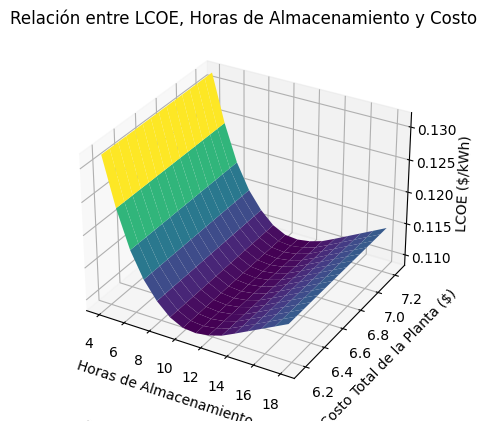

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Cargar los datos desde el archivo CSV
data = pd.read_csv('/home/cparrado/UNAB/csp2/resultados_simulacion.csv')

# Extraer las columnas necesarias
storage_hours = data['Horas_almacenamiento'].values
plant_costs = data['Costo_total_planta_$'].values
lcoe_values = data['LCOE_$'].values

# Asegurar que los datos estén alineados
X, Y = np.meshgrid(storage_hours, np.unique(plant_costs))

# Hacer que Z sea una matriz 2D basada en los valores de LCOE
Z = np.tile(lcoe_values, (len(np.unique(plant_costs)), 1))

# Crear el gráfico Surface 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(X, Y, Z, cmap='viridis')

# Añadir etiquetas y títulos
ax.set_xlabel('Horas de Almacenamiento')
ax.set_ylabel('Costo Total de la Planta ($)')
ax.set_zlabel('LCOE ($/kWh)')
ax.set_title('Relación entre LCOE, Horas de Almacenamiento y Costo')

# Mostrar el gráfico
plt.show()


In [8]:
pip install pandas numpy matplotlib seaborn statsmodels prophet


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Datos originales de costos marginales:
            item  Charrúa  Pan de Azúcar  Puerto Montt  Quillota  Crucero  \
0  2023-01-01 01   162.59         170.52        160.20    162.43   182.30   
1  2023-01-01 02   162.59         170.52        160.20    162.43   182.30   
2  2023-01-01 03   156.33         163.95        154.03    156.17   175.28   
3  2023-01-01 04   137.54         144.24        135.52    137.40   154.20   
4  2023-01-01 05   137.54         144.24        135.52    137.40   154.20   

   Cardones  addValue  
0    173.10       NaN  
1    173.10       NaN  
2    166.43       NaN  
3    146.43       NaN  
4    146.43       NaN  

Valores de 'FechaHora' antes de la conversión:
0    2023-01-01 01
1    2023-01-01 02
2    2023-01-01 03
3    2023-01-01 04
4    2023-01-01 05
5    2023-01-01 06
6    2023-01-01 07
7    2023-01-01 08
8    2023-01-01 09
9    2023-01-01 10
Name: FechaHora, dtype: object

Filas con fechas no válidas:
     FechaHora  Costo_marginal
23         NaT          

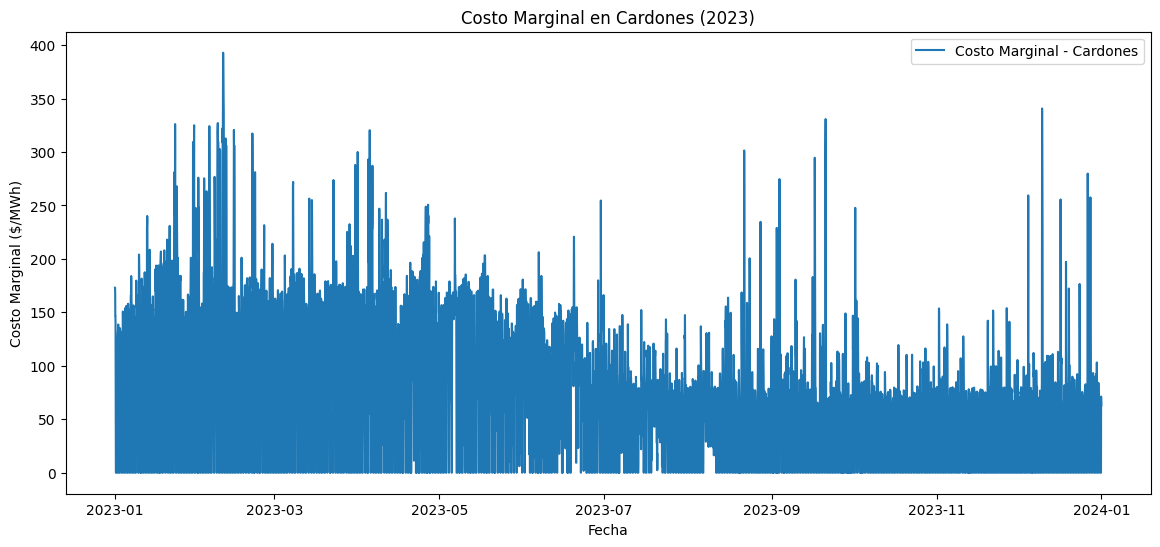


Resumen estadístico del Costo Marginal en 'Cardones':
count    8761.000000
mean       73.966150
std        69.645754
min         0.000000
25%         0.000000
50%        70.320000
75%       128.560000
max       393.150000
Name: Costo_marginal, dtype: float64


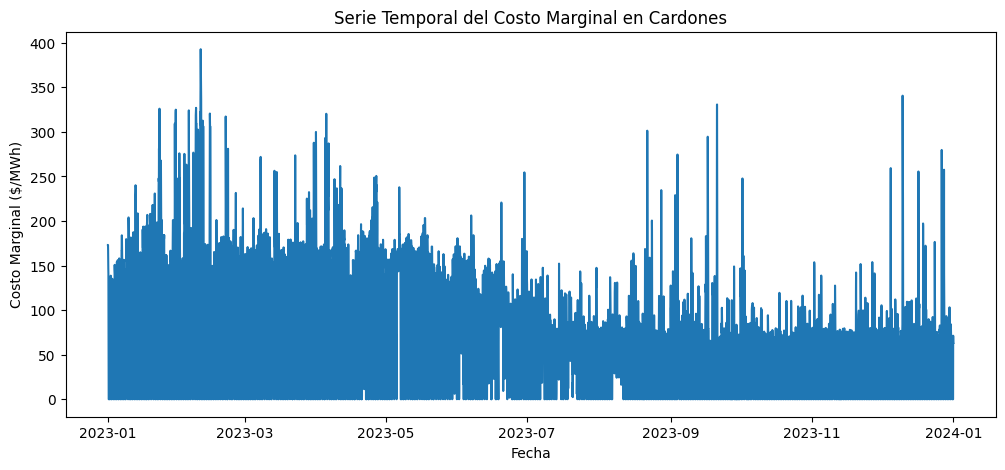


Prueba de Dickey-Fuller Aumentada:
Estadístico ADF: -6.051560193970598
Valor p: 1.2739541755660815e-07

Resumen del modelo ARIMA:
                               SARIMAX Results                                
Dep. Variable:         Costo_marginal   No. Observations:                 8761
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -42998.531
Date:                Mon, 14 Oct 2024   AIC                          86003.063
Time:                        16:50:30   BIC                          86024.297
Sample:                             0   HQIC                         86010.298
                               - 8761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1256      0.036     -3.515      0.000      -0.196      -0.056


ValueError: Neither `start` nor `end` can be NaT

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelado de series temporales
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# Paso 1: Cargar y Preparar los Datos
# ----------------------------

# Ruta al archivo de costos marginales
ruta_costos_marginales = '/home/cparrado/UNAB/csp2/2023-01-01_2023-12-31_costos-marginales-reales.csv'

# Cargar los datos de costos marginales
df_costos = pd.read_csv(
    ruta_costos_marginales,
    header=0,
    quotechar='"',
    sep=',',
    engine='python',
    skipinitialspace=True
)

# Ver las primeras filas
print("Datos originales de costos marginales:")
print(df_costos.head())

# ----------------------------
# Paso 2: Procesar los Datos de Costos Marginales
# ----------------------------

# Eliminar columnas innecesarias si es necesario
if 'addValue' in df_costos.columns:
    df_costos.drop(columns=['addValue'], inplace=True)

# Asegurarse de que las columnas están correctamente leídas
df_costos.columns = df_costos.columns.str.replace('"', '').str.strip()
df_costos['item'] = df_costos['item'].astype(str).str.replace('"', '').str.strip()

# Ahora, extraer la columna 'Cardones' y la columna 'item' que contiene la fecha y hora
df_cardones = df_costos[['item', 'Cardones']].copy()

# Renombrar las columnas para facilitar el manejo
df_cardones.rename(columns={'item': 'FechaHora', 'Cardones': 'Costo_marginal'}, inplace=True)

# Eliminar comillas y espacios adicionales en 'Costo_marginal'
df_cardones['Costo_marginal'] = df_cardones['Costo_marginal'].astype(str).str.replace('"', '').str.strip()

# Convertir 'Costo_marginal' a numérico
df_cardones['Costo_marginal'] = pd.to_numeric(df_cardones['Costo_marginal'], errors='coerce')

# Mostrar algunos valores de FechaHora
print("\nValores de 'FechaHora' antes de la conversión:")
print(df_cardones['FechaHora'].head(10))

# Eliminar comillas y espacios adicionales en 'FechaHora'
df_cardones['FechaHora'] = df_cardones['FechaHora'].astype(str).str.replace('"', '').str.strip()

# Verificar si las cadenas tienen ':' indicando minutos
if df_cardones['FechaHora'].str.contains(':').any():
    # Si hay minutos, ajustar el formato
    date_format = '%Y-%m-%d %H:%M'
else:
    # Si no hay minutos, usar el formato original
    date_format = '%Y-%m-%d %H'

# Intentar convertir las fechas
df_cardones['FechaHora'] = pd.to_datetime(df_cardones['FechaHora'], format=date_format, errors='coerce')

# Identificar fechas no convertidas
fechas_invalidas = df_cardones[df_cardones['FechaHora'].isna()]

if not fechas_invalidas.empty:
    print("\nFilas con fechas no válidas:")
    print(fechas_invalidas)
else:
    print("\nTodas las fechas fueron convertidas correctamente.")

# Ordenar los datos por fecha y hora
df_cardones.sort_values('FechaHora', inplace=True)

# Establecer 'FechaHora' como índice
df_cardones.set_index('FechaHora', inplace=True)

# Ver las primeras filas del dataframe procesado
print("\nDatos procesados de costos marginales para 'Cardones':")
print(df_cardones.head())

# ----------------------------
# Paso 3: Visualización y Análisis Descriptivo
# ----------------------------

# Graficar la serie temporal del costo marginal en 'Cardones'
plt.figure(figsize=(14,6))
plt.plot(df_cardones.index, df_cardones['Costo_marginal'], label='Costo Marginal - Cardones')
plt.legend()
plt.title('Costo Marginal en Cardones (2023)')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.show()

# Resumen estadístico
print("\nResumen estadístico del Costo Marginal en 'Cardones':")
print(df_cardones['Costo_marginal'].describe())

# ----------------------------
# Paso 4: Análisis Predictivo con ARIMA
# ----------------------------

# Seleccionar la variable objetivo
ts_data = df_cardones['Costo_marginal'].dropna()

# Graficar la serie temporal
plt.figure(figsize=(12,5))
plt.plot(ts_data)
plt.title('Serie Temporal del Costo Marginal en Cardones')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.show()

# Prueba de Estacionariedad (Dickey-Fuller aumentada)
result = adfuller(ts_data)
print('\nPrueba de Dickey-Fuller Aumentada:')
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

# Si la serie no es estacionaria, diferenciarla
if result[1] > 0.05:
    ts_data_diff = ts_data.diff().dropna()
    # Repetir la prueba ADF
    result_diff = adfuller(ts_data_diff)
    print('\nPrueba ADF después de diferenciar:')
    print('Estadístico ADF:', result_diff[0])
    print('Valor p:', result_diff[1])
    ts_data_to_use = ts_data_diff
else:
    ts_data_to_use = ts_data

# Ajustar el modelo ARIMA
# Puedes usar auto_arima de pmdarima para determinar los mejores parámetros (p, d, q)
# Aquí usaremos (p=1, d=1, q=1) como ejemplo
model_arima = ARIMA(ts_data, order=(1,1,1))
model_arima_fit = model_arima.fit()

# Resumen del modelo
print("\nResumen del modelo ARIMA:")
print(model_arima_fit.summary())

# Realizar predicciones
forecast_arima = model_arima_fit.forecast(steps=24)  # Predecir las próximas 24 horas

# Crear un índice de fechas para las predicciones
forecast_index_arima = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(hours=1), periods=24, freq='H')

# Graficar las predicciones
plt.figure(figsize=(12,5))
plt.plot(ts_data[-168:], label='Datos Históricos (última semana)')
plt.plot(forecast_index_arima, forecast_arima, label='Pronóstico ARIMA', color='red')
plt.title('Pronóstico del Costo Marginal con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# ----------------------------
# Paso 5: Análisis Predictivo con Prophet
# ----------------------------

# Preparar los datos para Prophet
df_prophet = df_cardones.reset_index().rename(columns={'FechaHora': 'ds', 'Costo_marginal': 'y'})

# Crear y ajustar el modelo Prophet
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Crear dataframe futuro para predicciones
future_prophet = model_prophet.make_future_dataframe(periods=24, freq='H')  # Predecir las próximas 24 horas

# Realizar predicciones
forecast_prophet = model_prophet.predict(future_prophet)

# Graficar las predicciones
model_prophet.plot(forecast_prophet)
plt.title('Pronóstico del Costo Marginal con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.show()

# Graficar los componentes de la predicción
model_prophet.plot_components(forecast_prophet)
plt.show()

# ----------------------------
# Paso 6: Comparación de Modelos
# ----------------------------

# Extraer las predicciones para el mismo periodo
prophet_pred = forecast_prophet.set_index('ds')['yhat'].loc[forecast_index_arima]

# Graficar las predicciones de ambos modelos
plt.figure(figsize=(12,5))
plt.plot(ts_data[-168:], label='Datos Históricos (última semana)')
plt.plot(forecast_index_arima, forecast_arima, label='Pronóstico ARIMA', color='red')
plt.plot(forecast_index_arima, prophet_pred, label='Pronóstico Prophet', color='green')
plt.title('Comparación de Pronósticos del Costo Marginal')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# ----------------------------
# Paso 7: Guardar las Predicciones (opcional)
# ----------------------------

# Guardar las predicciones en un archivo CSV
df_predicciones = pd.DataFrame({
    'Fecha': forecast_index_arima,
    'ARIMA_Prediccion': forecast_arima,
    'Prophet_Prediccion': prophet_pred.values
})
df_predicciones.to_csv('/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv', index=False)

print("\nPredicciones guardadas en '/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv'")


In [3]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.1.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
  Using cached cmdstanpy-1.2.4-py3-none-any.whl.metadata (4.1 kB)
  Using cached holidays-0.57-py3-none-any.whl.metadata (26 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.4 MB)
Using cached cmdstanpy-1.2.4-py3-none-any.whl (94 kB)
Using cached holidays-0.57-py3-none-any.whl (1.1 MB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)
Note: you may need to restart the kernel to use updated packages.


Datos originales de costos marginales:
            item  Charrúa  Pan de Azúcar  Puerto Montt  Quillota  Crucero  \
0  2023-01-01 01   162.59         170.52        160.20    162.43   182.30   
1  2023-01-01 02   162.59         170.52        160.20    162.43   182.30   
2  2023-01-01 03   156.33         163.95        154.03    156.17   175.28   
3  2023-01-01 04   137.54         144.24        135.52    137.40   154.20   
4  2023-01-01 05   137.54         144.24        135.52    137.40   154.20   

   Cardones  addValue  
0    173.10       NaN  
1    173.10       NaN  
2    166.43       NaN  
3    146.43       NaN  
4    146.43       NaN  

Valores de 'FechaHora' antes de la conversión:
0    2023-01-01 01
1    2023-01-01 02
2    2023-01-01 03
3    2023-01-01 04
4    2023-01-01 05
5    2023-01-01 06
6    2023-01-01 07
7    2023-01-01 08
8    2023-01-01 09
9    2023-01-01 10
Name: FechaHora, dtype: object

Filas con fechas no válidas:
     FechaHora  Costo_marginal
23         NaT          

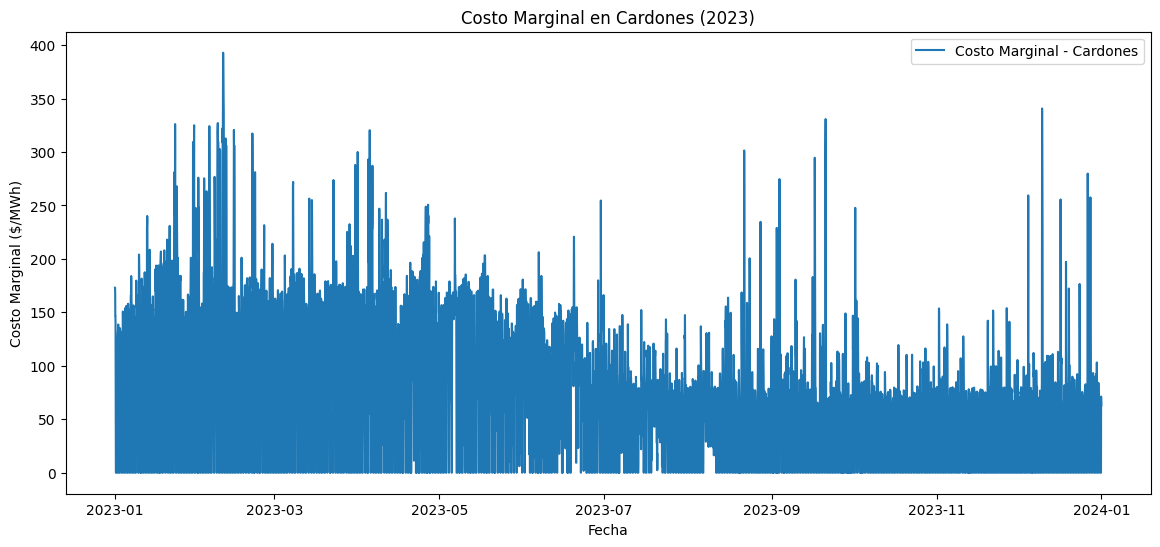


Resumen estadístico del Costo Marginal en 'Cardones':
count    8397.000000
mean       71.766782
std        69.428717
min         0.000000
25%         0.000000
50%        68.670000
75%       125.650000
max       392.820000
Name: Costo_marginal, dtype: float64


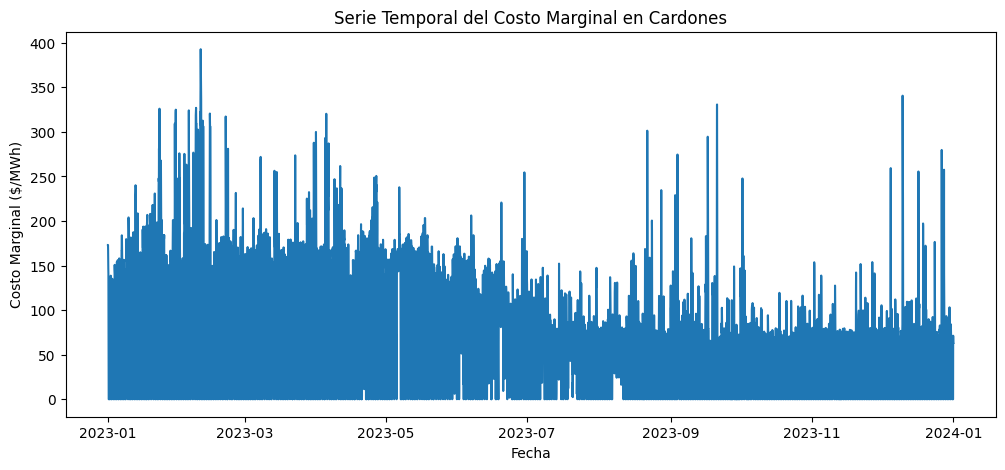


Prueba de Dickey-Fuller Aumentada:
Estadístico ADF: -5.742529383558929
Valor p: 6.227763242530224e-07

Resumen del modelo ARIMA:
                               SARIMAX Results                                
Dep. Variable:         Costo_marginal   No. Observations:                 8397
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -41008.969
Date:                Mon, 14 Oct 2024   AIC                          82023.939
Time:                        16:50:57   BIC                          82045.045
Sample:                             0   HQIC                         82031.146
                               - 8397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0781      0.035     -2.253      0.024      -0.146      -0.010
m

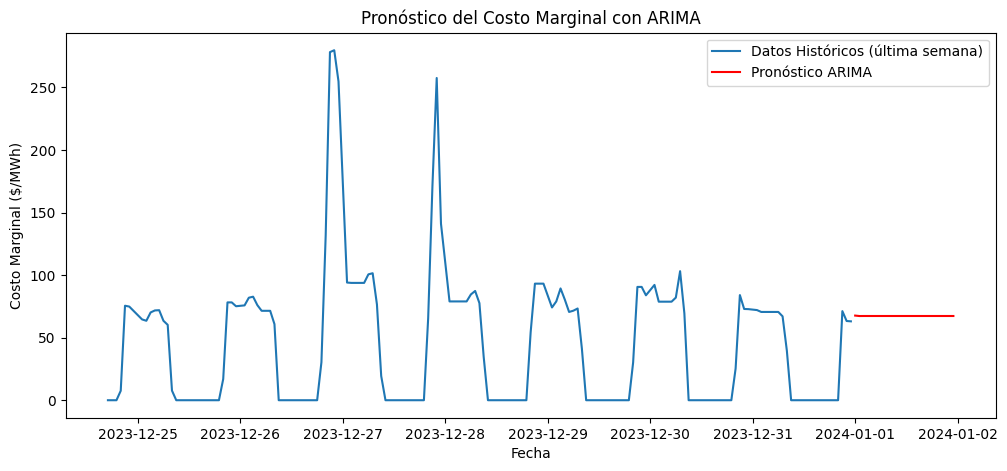

16:50:57 - cmdstanpy - INFO - Chain [1] start processing
16:50:58 - cmdstanpy - INFO - Chain [1] done processing


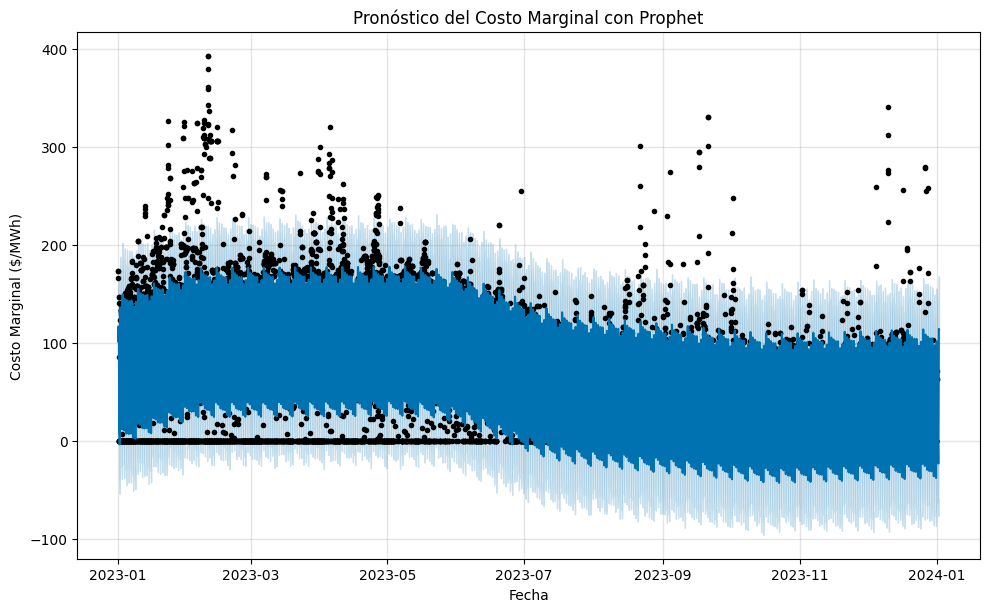

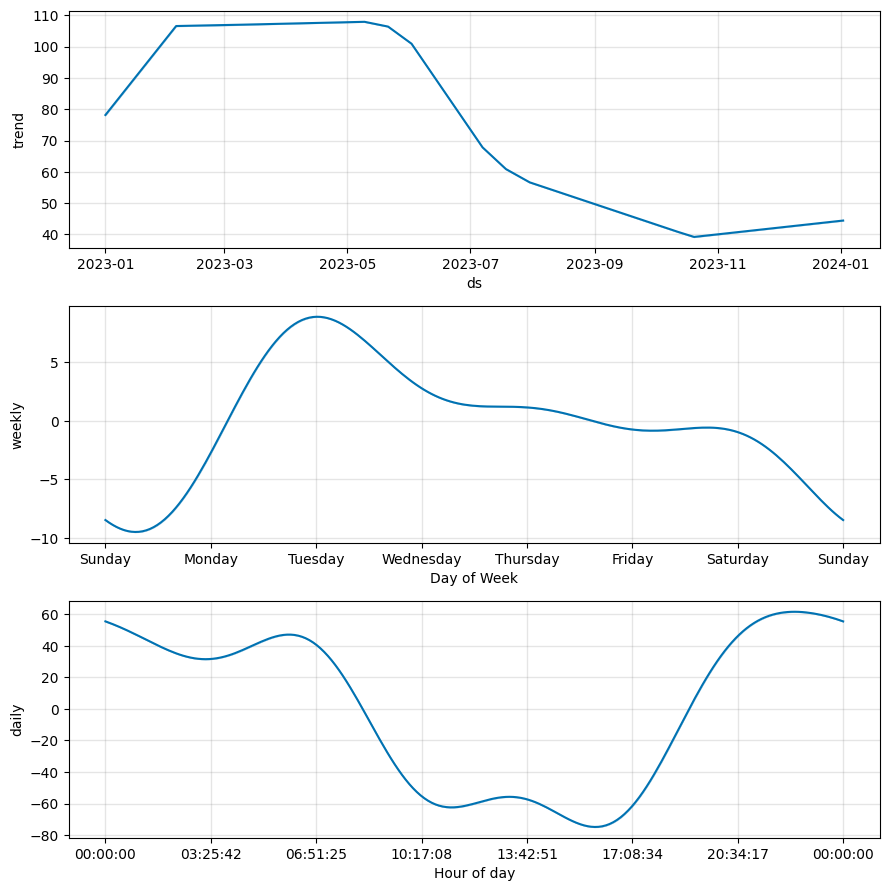

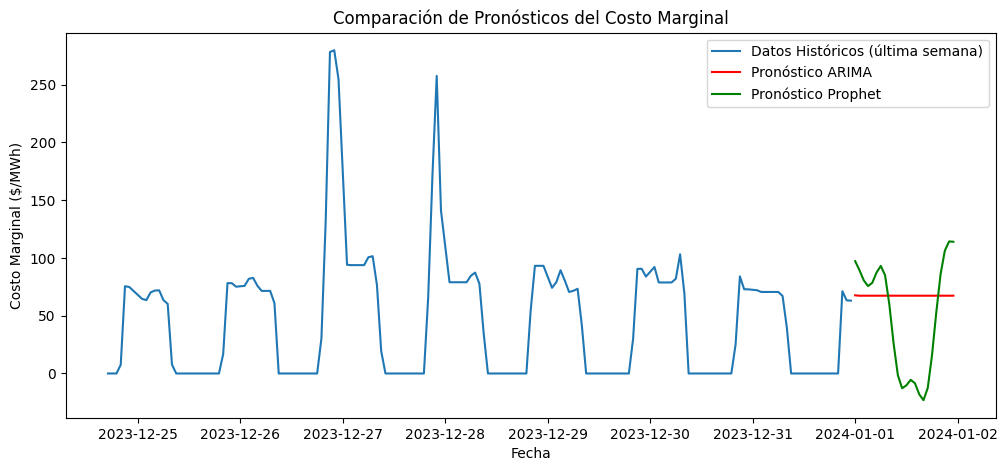


Predicciones guardadas en '/home/cparrado/unab/predicciones_costos_marginales.csv'


In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelado de series temporales
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# Paso 1: Cargar y Preparar los Datos
# ----------------------------

# Ruta al archivo de costos marginales
ruta_costos_marginales = '/home/cparrado/UNAB/csp2/2023-01-01_2023-12-31_costos-marginales-reales.csv'

# Cargar los datos de costos marginales
df_costos = pd.read_csv(
    ruta_costos_marginales,
    header=0,
    quotechar='"',
    sep=',',
    engine='python',
    skipinitialspace=True
)

# Ver las primeras filas
print("Datos originales de costos marginales:")
print(df_costos.head())

# ----------------------------
# Paso 2: Procesar los Datos de Costos Marginales
# ----------------------------

# Eliminar columnas innecesarias si es necesario
if 'addValue' in df_costos.columns:
    df_costos.drop(columns=['addValue'], inplace=True)

# Asegurarse de que las columnas están correctamente leídas
df_costos.columns = df_costos.columns.str.replace('"', '').str.strip()
df_costos['item'] = df_costos['item'].astype(str).str.replace('"', '').str.strip()

# Ahora, extraer la columna 'Cardones' y la columna 'item' que contiene la fecha y hora
df_cardones = df_costos[['item', 'Cardones']].copy()

# Renombrar las columnas para facilitar el manejo
df_cardones.rename(columns={'item': 'FechaHora', 'Cardones': 'Costo_marginal'}, inplace=True)

# Eliminar comillas y espacios adicionales en 'Costo_marginal'
df_cardones['Costo_marginal'] = df_cardones['Costo_marginal'].astype(str).str.replace('"', '').str.strip()

# Convertir 'Costo_marginal' a numérico
df_cardones['Costo_marginal'] = pd.to_numeric(df_cardones['Costo_marginal'], errors='coerce')

# Mostrar algunos valores de FechaHora
print("\nValores de 'FechaHora' antes de la conversión:")
print(df_cardones['FechaHora'].head(10))

# Eliminar comillas y espacios adicionales en 'FechaHora'
df_cardones['FechaHora'] = df_cardones['FechaHora'].astype(str).str.replace('"', '').str.strip()

# Verificar si las cadenas tienen ':' indicando minutos
if df_cardones['FechaHora'].str.contains(':').any():
    # Si hay minutos, ajustar el formato
    date_format = '%Y-%m-%d %H:%M'
else:
    # Si no hay minutos, usar el formato original
    date_format = '%Y-%m-%d %H'

# Intentar convertir las fechas
df_cardones['FechaHora'] = pd.to_datetime(df_cardones['FechaHora'], format=date_format, errors='coerce')

# Identificar fechas no convertidas
fechas_invalidas = df_cardones[df_cardones['FechaHora'].isna()]

if not fechas_invalidas.empty:
    print("\nFilas con fechas no válidas:")
    print(fechas_invalidas)
else:
    print("\nTodas las fechas fueron convertidas correctamente.")

# Eliminar filas con fechas no válidas si es necesario
df_cardones = df_cardones[~df_cardones['FechaHora'].isna()]

# Ordenar los datos por fecha y hora
df_cardones.sort_values('FechaHora', inplace=True)

# Establecer 'FechaHora' como índice
df_cardones.set_index('FechaHora', inplace=True)

# Ver las primeras filas del dataframe procesado
print("\nDatos procesados de costos marginales para 'Cardones':")
print(df_cardones.head())

# ----------------------------
# Paso 3: Visualización y Análisis Descriptivo
# ----------------------------

# Graficar la serie temporal del costo marginal en 'Cardones'
plt.figure(figsize=(14,6))
plt.plot(df_cardones.index, df_cardones['Costo_marginal'], label='Costo Marginal - Cardones')
plt.legend()
plt.title('Costo Marginal en Cardones (2023)')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.show()

# Resumen estadístico
print("\nResumen estadístico del Costo Marginal en 'Cardones':")
print(df_cardones['Costo_marginal'].describe())

# ----------------------------
# Paso 4: Análisis Predictivo con ARIMA
# ----------------------------

# Seleccionar la variable objetivo
ts_data = df_cardones['Costo_marginal'].dropna()

# Verificar el tipo de índice y convertir si es necesario
if not isinstance(ts_data.index, pd.DatetimeIndex):
    ts_data.index = pd.to_datetime(ts_data.index, errors='coerce')

# Eliminar filas con índices nulos
ts_data = ts_data[~ts_data.index.isna()]

# Verificar que ts_data no esté vacío
if ts_data.empty:
    print("Error: ts_data está vacío después de eliminar índices nulos.")
else:
    # Graficar la serie temporal
    plt.figure(figsize=(12,5))
    plt.plot(ts_data)
    plt.title('Serie Temporal del Costo Marginal en Cardones')
    plt.xlabel('Fecha')
    plt.ylabel('Costo Marginal ($/MWh)')
    plt.show()

    # Prueba de Estacionariedad (Dickey-Fuller aumentada)
    result = adfuller(ts_data)
    print('\nPrueba de Dickey-Fuller Aumentada:')
    print('Estadístico ADF:', result[0])
    print('Valor p:', result[1])

    # Si la serie no es estacionaria, diferenciarla
    if result[1] > 0.05:
        ts_data_diff = ts_data.diff().dropna()
        # Repetir la prueba ADF
        result_diff = adfuller(ts_data_diff)
        print('\nPrueba ADF después de diferenciar:')
        print('Estadístico ADF:', result_diff[0])
        print('Valor p:', result_diff[1])
        ts_data_to_use = ts_data_diff
    else:
        ts_data_to_use = ts_data

    # Ajustar el modelo ARIMA
    model_arima = ARIMA(ts_data_to_use, order=(1,1,1))
    model_arima_fit = model_arima.fit()

    # Resumen del modelo
    print("\nResumen del modelo ARIMA:")
    print(model_arima_fit.summary())

    # Realizar predicciones
    forecast_arima = model_arima_fit.forecast(steps=24)  # Predecir las próximas 24 horas

    # Crear un índice de fechas para las predicciones
    last_date = ts_data_to_use.index[-1]
    if pd.isnull(last_date):
        print("Error: El último valor del índice de ts_data_to_use es NaT.")
    else:
        forecast_index_arima = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=24, freq='H')

        # Graficar las predicciones
        plt.figure(figsize=(12,5))
        plt.plot(ts_data_to_use[-168:], label='Datos Históricos (última semana)')
        plt.plot(forecast_index_arima, forecast_arima, label='Pronóstico ARIMA', color='red')
        plt.title('Pronóstico del Costo Marginal con ARIMA')
        plt.xlabel('Fecha')
        plt.ylabel('Costo Marginal ($/MWh)')
        plt.legend()
        plt.show()

        # ----------------------------
        # Paso 5: Análisis Predictivo con Prophet
        # ----------------------------

        # Preparar los datos para Prophet
        df_prophet = ts_data_to_use.reset_index().rename(columns={'FechaHora': 'ds', 'Costo_marginal': 'y'})

        # Crear y ajustar el modelo Prophet
        model_prophet = Prophet()
        model_prophet.fit(df_prophet)

        # Crear dataframe futuro para predicciones
        future_prophet = model_prophet.make_future_dataframe(periods=24, freq='H')  # Predecir las próximas 24 horas

        # Realizar predicciones
        forecast_prophet = model_prophet.predict(future_prophet)

        # Graficar las predicciones
        model_prophet.plot(forecast_prophet)
        plt.title('Pronóstico del Costo Marginal con Prophet')
        plt.xlabel('Fecha')
        plt.ylabel('Costo Marginal ($/MWh)')
        plt.show()

        # Graficar los componentes de la predicción
        model_prophet.plot_components(forecast_prophet)
        plt.show()

        # ----------------------------
        # Paso 6: Comparación de Modelos
        # ----------------------------

        # Extraer las predicciones para el mismo periodo
        prophet_pred = forecast_prophet.set_index('ds')['yhat'].loc[forecast_index_arima]

        # Graficar las predicciones de ambos modelos
        plt.figure(figsize=(12,5))
        plt.plot(ts_data_to_use[-168:], label='Datos Históricos (última semana)')
        plt.plot(forecast_index_arima, forecast_arima, label='Pronóstico ARIMA', color='red')
        plt.plot(forecast_index_arima, prophet_pred, label='Pronóstico Prophet', color='green')
        plt.title('Comparación de Pronósticos del Costo Marginal')
        plt.xlabel('Fecha')
        plt.ylabel('Costo Marginal ($/MWh)')
        plt.legend()
        plt.show()

        # ----------------------------
        # Paso 7: Guardar las Predicciones (opcional)
        # ----------------------------

        # Guardar las predicciones en un archivo CSV
        df_predicciones = pd.DataFrame({
            'Fecha': forecast_index_arima,
            'ARIMA_Prediccion': forecast_arima,
            'Prophet_Prediccion': prophet_pred.values
        })
        df_predicciones.to_csv('/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv', index=False)

        print("\nPredicciones guardadas en '/home/cparrado/unab/predicciones_costos_marginales.csv'")


Datos originales de costos marginales:
            item  Charrúa  Pan de Azúcar  Puerto Montt  Quillota  Crucero  \
0  2023-01-01 01   162.59         170.52        160.20    162.43   182.30   
1  2023-01-01 02   162.59         170.52        160.20    162.43   182.30   
2  2023-01-01 03   156.33         163.95        154.03    156.17   175.28   
3  2023-01-01 04   137.54         144.24        135.52    137.40   154.20   
4  2023-01-01 05   137.54         144.24        135.52    137.40   154.20   

   Cardones  addValue  
0    173.10       NaN  
1    173.10       NaN  
2    166.43       NaN  
3    146.43       NaN  
4    146.43       NaN  

Filas con fechas no válidas:
     FechaHora  Costo_marginal
23         NaT          122.83
47         NaT          125.12
71         NaT          144.58
95         NaT          136.69
119        NaT          135.58
...        ...             ...
8664       NaT          103.13
8688       NaT           83.35
8712       NaT           83.87
8736       NaT

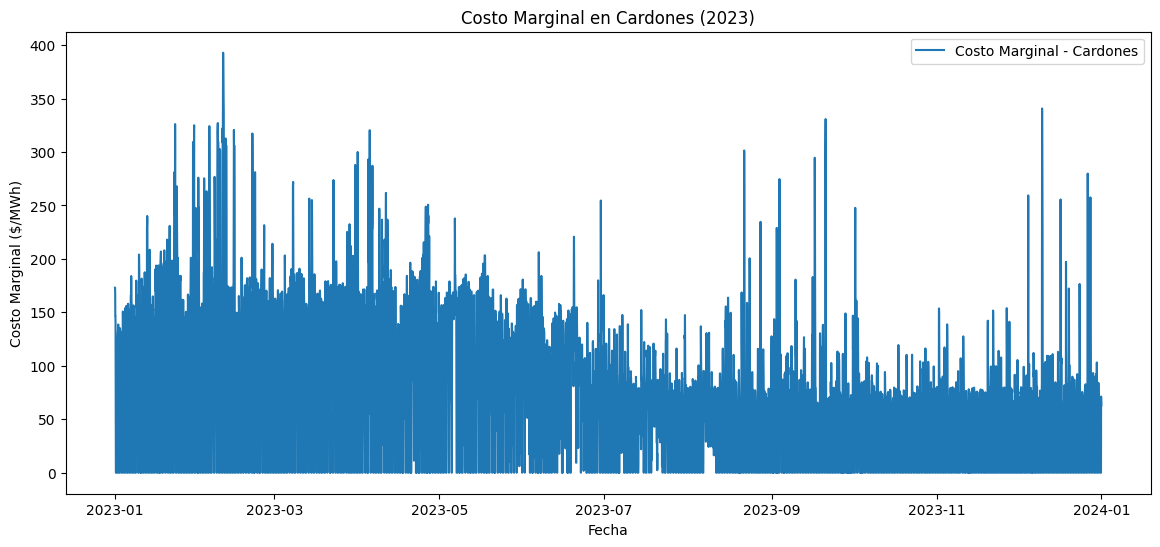


Resumen estadístico del Costo Marginal en 'Cardones':
count    8397.000000
mean       71.766782
std        69.428717
min         0.000000
25%         0.000000
50%        68.670000
75%       125.650000
max       392.820000
Name: Costo_marginal, dtype: float64

Prueba de Dickey-Fuller Aumentada:
Estadístico ADF: -5.742529383558929
Valor p: 6.227763242530224e-07

La serie es estacionaria.


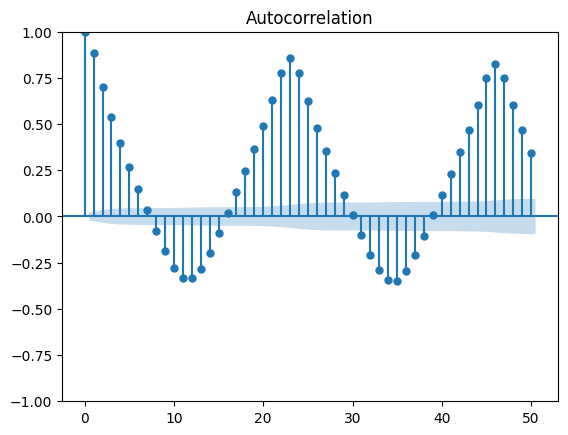

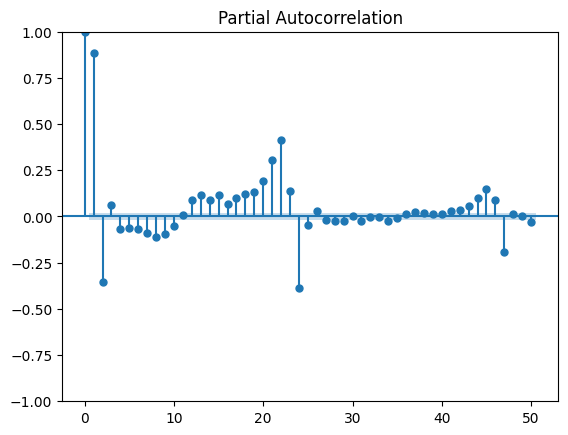

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=inf, Time=250.32 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=68943.261, Time=0.54 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=68472.704, Time=5.65 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=161.28 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=68914.820, Time=0.37 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=67707.723, Time=189.74 sec


In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelado de series temporales
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from prophet import Prophet

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# Paso 1: Cargar y Preparar los Datos
# ----------------------------

# Ruta al archivo de costos marginales
ruta_costos_marginales = '/home/cparrado/UNAB/csp2/2023-01-01_2023-12-31_costos-marginales-reales.csv'

# Cargar los datos de costos marginales
df_costos = pd.read_csv(
    ruta_costos_marginales,
    header=0,
    quotechar='"',
    sep=',',
    engine='python',
    skipinitialspace=True
)

# Ver las primeras filas
print("Datos originales de costos marginales:")
print(df_costos.head())

# ----------------------------
# Paso 2: Procesar los Datos de Costos Marginales
# ----------------------------

# Eliminar columnas innecesarias si es necesario
if 'addValue' in df_costos.columns:
    df_costos.drop(columns=['addValue'], inplace=True)

# Asegurarse de que las columnas están correctamente leídas
df_costos.columns = df_costos.columns.str.replace('"', '').str.strip()
df_costos['item'] = df_costos['item'].astype(str).str.replace('"', '').str.strip()

# Ahora, extraer la columna 'Cardones' y la columna 'item' que contiene la fecha y hora
df_cardones = df_costos[['item', 'Cardones']].copy()

# Renombrar las columnas para facilitar el manejo
df_cardones.rename(columns={'item': 'FechaHora', 'Cardones': 'Costo_marginal'}, inplace=True)

# Eliminar comillas y espacios adicionales en 'Costo_marginal'
df_cardones['Costo_marginal'] = df_cardones['Costo_marginal'].astype(str).str.replace('"', '').str.strip()

# Convertir 'Costo_marginal' a numérico
df_cardones['Costo_marginal'] = pd.to_numeric(df_cardones['Costo_marginal'], errors='coerce')

# Eliminar comillas y espacios adicionales en 'FechaHora'
df_cardones['FechaHora'] = df_cardones['FechaHora'].astype(str).str.replace('"', '').str.strip()

# Verificar si las cadenas tienen ':' indicando minutos
if df_cardones['FechaHora'].str.contains(':').any():
    # Si hay minutos, ajustar el formato
    date_format = '%Y-%m-%d %H:%M'
else:
    # Si no hay minutos, usar el formato original
    date_format = '%Y-%m-%d %H'

# Intentar convertir las fechas
df_cardones['FechaHora'] = pd.to_datetime(df_cardones['FechaHora'], format=date_format, errors='coerce')

# Identificar fechas no convertidas
fechas_invalidas = df_cardones[df_cardones['FechaHora'].isna()]

if not fechas_invalidas.empty:
    print("\nFilas con fechas no válidas:")
    print(fechas_invalidas)
else:
    print("\nTodas las fechas fueron convertidas correctamente.")

# Eliminar filas con fechas no válidas
df_cardones = df_cardones.dropna(subset=['FechaHora'])

# Ordenar los datos por fecha y hora
df_cardones.sort_values('FechaHora', inplace=True)

# Establecer 'FechaHora' como índice
df_cardones.set_index('FechaHora', inplace=True)

# Ver las primeras filas del dataframe procesado
print("\nDatos procesados de costos marginales para 'Cardones':")
print(df_cardones.head())

# ----------------------------
# Paso 3: Exploración y Visualización de Datos
# ----------------------------

# Graficar la serie temporal completa
plt.figure(figsize=(14,6))
plt.plot(df_cardones.index, df_cardones['Costo_marginal'], label='Costo Marginal - Cardones')
plt.legend()
plt.title('Costo Marginal en Cardones (2023)')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.show()

# Resumen estadístico
print("\nResumen estadístico del Costo Marginal en 'Cardones':")
print(df_cardones['Costo_marginal'].describe())

# ----------------------------
# Paso 4: Análisis de Estacionariedad y Estacionalidad
# ----------------------------

# Seleccionar la variable objetivo
ts_data = df_cardones['Costo_marginal'].dropna()

# Verificar el tipo de índice y convertir si es necesario
if not isinstance(ts_data.index, pd.DatetimeIndex):
    ts_data.index = pd.to_datetime(ts_data.index, errors='coerce')

# Eliminar filas con índices nulos
ts_data = ts_data[~ts_data.index.isna()]

# Prueba de Dickey-Fuller Aumentada
result = adfuller(ts_data)
print('\nPrueba de Dickey-Fuller Aumentada:')
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

# Si la serie no es estacionaria, diferenciarla
if result[1] > 0.05:
    ts_data_diff = ts_data.diff().dropna()
    ts_data_to_use = ts_data_diff
    print("\nLa serie no es estacionaria. Se aplicó una diferenciación.")
else:
    ts_data_to_use = ts_data
    print("\nLa serie es estacionaria.")

# Graficar la serie diferenciada si se aplicó diferenciación
if result[1] > 0.05:
    plt.figure(figsize=(12,5))
    plt.plot(ts_data_diff)
    plt.title('Serie Temporal Diferenciada del Costo Marginal en Cardones')
    plt.xlabel('Fecha')
    plt.ylabel('Diferencia del Costo Marginal ($/MWh)')
    plt.show()

# Graficar ACF y PACF
plot_acf(ts_data_to_use, lags=50)
plt.show()

plot_pacf(ts_data_to_use, lags=50)
plt.show()

# ----------------------------
# Paso 5: División de Datos para Entrenamiento y Prueba
# ----------------------------

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(ts_data_to_use) * 0.8)
train_data = ts_data_to_use.iloc[:train_size]
test_data = ts_data_to_use.iloc[train_size:]

# ----------------------------
# Paso 6: Modelado con auto_arima
# ----------------------------

# Ajustar el modelo auto_arima
model_auto = auto_arima(
    train_data,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=24,  # Estacionalidad diaria en datos horarios
    start_P=0, max_P=2, max_Q=2, seasonal=True,
    d=1, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print("\nResumen del modelo auto_arima:")
print(model_auto.summary())

# ----------------------------
# Paso 7: Validación del Modelo
# ----------------------------

# Realizar predicciones en el conjunto de prueba
n_periods = len(test_data)
forecast_auto = model_auto.predict(n_periods=n_periods)
forecast_index = test_data.index

# Convertir forecast_auto a Serie de pandas con el índice correspondiente
forecast_series = pd.Series(forecast_auto, index=forecast_index)

# Graficar las predicciones vs los datos reales
plt.figure(figsize=(12,5))
plt.plot(train_data[-168:], label='Datos de Entrenamiento (última semana)')
plt.plot(test_data, label='Datos Reales')
plt.plot(forecast_series, label='Predicciones auto_arima', color='red')
plt.title('Predicciones del Costo Marginal con auto_arima')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# Calcular métricas de error
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, forecast_series)
rmse = np.sqrt(mean_squared_error(test_data, forecast_series))

print(f"\nMétricas de error del modelo auto_arima:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# ----------------------------
# Paso 8: Ajuste Final y Pronóstico Futuro
# ----------------------------

# Reentrenar el modelo con todos los datos
model_auto_final = auto_arima(
    ts_data_to_use,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=24,
    start_P=0, max_P=2, max_Q=2, seasonal=True,
    d=1, D=1,
    trace=False,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Realizar predicciones futuras
n_future = 24  # Predecir las próximas 24 horas
forecast_future = model_auto_final.predict(n_periods=n_future)
forecast_index_future = pd.date_range(start=ts_data_to_use.index[-1] + pd.Timedelta(hours=1), periods=n_future, freq='H')

# Convertir forecast_future a Serie de pandas con el índice correspondiente
forecast_future_series = pd.Series(forecast_future, index=forecast_index_future)

# Graficar las predicciones futuras
plt.figure(figsize=(12,5))
plt.plot(ts_data_to_use[-168:], label='Datos Históricos (última semana)')
plt.plot(forecast_future_series, label='Pronóstico Futuro auto_arima', color='purple')
plt.title('Pronóstico Futuro del Costo Marginal con auto_arima')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# ----------------------------
# Paso 9: Comparación con Modelo Prophet
# ----------------------------

# Preparar los datos para Prophet
df_prophet = ts_data.reset_index().rename(columns={'FechaHora': 'ds', 'Costo_marginal': 'y'})

# Crear y ajustar el modelo Prophet
model_prophet = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False  # Ajustar según sea necesario
)
model_prophet.fit(df_prophet)

# Crear dataframe futuro para predicciones
future_prophet = model_prophet.make_future_dataframe(periods=n_future, freq='H')

# Realizar predicciones
forecast_prophet = model_prophet.predict(future_prophet)

# Extraer las predicciones futuras
forecast_prophet_future = forecast_prophet[['ds', 'yhat']].set_index('ds').loc[forecast_index_future]

# Graficar las predicciones de ambos modelos
plt.figure(figsize=(12,5))
plt.plot(ts_data_to_use[-168:], label='Datos Históricos (última semana)')
plt.plot(forecast_future_series, label='Pronóstico auto_arima', color='purple')
plt.plot(forecast_prophet_future['yhat'], label='Pronóstico Prophet', color='green')
plt.title('Comparación de Pronósticos del Costo Marginal')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# ----------------------------
# Paso 10: Guardar las Predicciones (opcional)
# ----------------------------

# Guardar las predicciones en un archivo CSV
df_predicciones = pd.DataFrame({
    'Fecha': forecast_index_future,
    'ARIMA_Prediccion': forecast_future_series.values,
    'Prophet_Prediccion': forecast_prophet_future['yhat'].values
})
df_predicciones.to_csv('/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv', index=False)

print("\nPredicciones guardadas en '/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv'")

# ----------------------------
# Paso 11: Análisis de Residuos del Modelo auto_arima
# ----------------------------

# Obtener los residuos del modelo
residuos = model_auto_final.resid()

# Graficar los residuos
plt.figure(figsize=(12,6))
plt.plot(residuos)
plt.title('Residuos del Modelo auto_arima')
plt.xlabel('Fecha')
plt.ylabel('Residuo')
plt.show()

# Graficar histograma de residuos
plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de normalidad de Shapiro-Wilk
from scipy.stats import shapiro

stat, p = shapiro(residuos)
print('\nPrueba de Shapiro-Wilk para los residuos:')
print('Estadístico:', stat)
print('Valor p:', p)

if p > 0.05:
    print("No se rechaza la hipótesis nula: los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.")

# ----------------------------
# Paso 12: Conclusiones
# ----------------------------

# (Aquí puedes agregar tus propias conclusiones basadas en los resultados obtenidos)


In [1]:
!pip install prophet

Datos originales de costos marginales:
            item  Charrúa  Pan de Azúcar  Puerto Montt  Quillota  Crucero  \
0  2023-01-01 01   162.59         170.52        160.20    162.43   182.30   
1  2023-01-01 02   162.59         170.52        160.20    162.43   182.30   
2  2023-01-01 03   156.33         163.95        154.03    156.17   175.28   
3  2023-01-01 04   137.54         144.24        135.52    137.40   154.20   
4  2023-01-01 05   137.54         144.24        135.52    137.40   154.20   

   Cardones  addValue  
0    173.10       NaN  
1    173.10       NaN  
2    166.43       NaN  
3    146.43       NaN  
4    146.43       NaN  

Filas con fechas no válidas:
     FechaHora  Costo_marginal
23         NaT          122.83
47         NaT          125.12
71         NaT          144.58
95         NaT          136.69
119        NaT          135.58
...        ...             ...
8664       NaT          103.13
8688       NaT           83.35
8712       NaT           83.87
8736       NaT

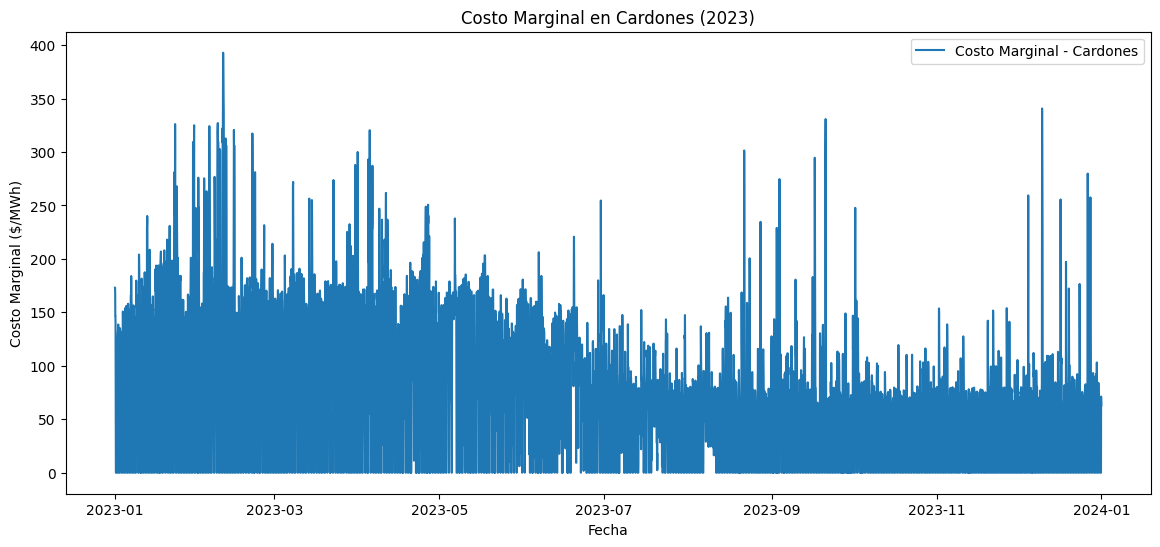


Resumen estadístico del Costo Marginal en 'Cardones':
count    8397.000000
mean       71.766782
std        69.428717
min         0.000000
25%         0.000000
50%        68.670000
75%       125.650000
max       392.820000
Name: Costo_marginal, dtype: float64

Prueba de Dickey-Fuller Aumentada:
Estadístico ADF: -6.513865276229003
Valor p: 1.0834931333569359e-08

La serie es estacionaria.


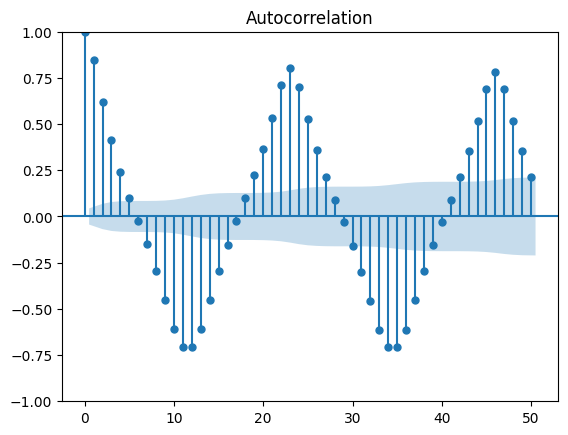

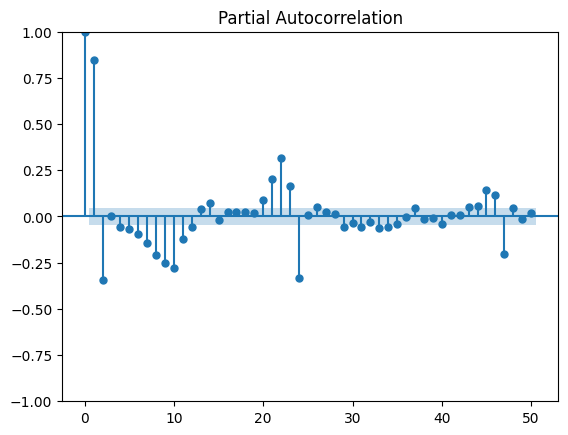

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=62.11 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=15366.161, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=14494.675, Time=67.45 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=14519.601, Time=48.56 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=15364.260, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=14661.321, Time=0.48 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=75.18 sec
 ARIMA(1,0,0)(0,1,1)[24] intercept   : AIC=14343.736, Time=52.23 sec
 ARIMA(0,0,0)(0,1,1)[24] intercept   : AIC=15292.583, Time=45.31 sec
 ARIMA(2,0,0)(0,1,1)[24] intercept   : AIC=inf, Time=82.57 sec
 ARIMA(2,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=109.31 sec
 ARIMA(1,0,0)(0,1,1)[24]             : AIC=14341.741, Time=26.56 sec
 ARIMA(1,0,0)(0,1,0)[24]             : AIC=14659.349, Time=0.11 sec
 ARIMA(1,0,0)(1,1,1)[24]             : AIC=inf, Time=78.52 sec
 ARIMA(1,0,0)(1,1,0)[24]

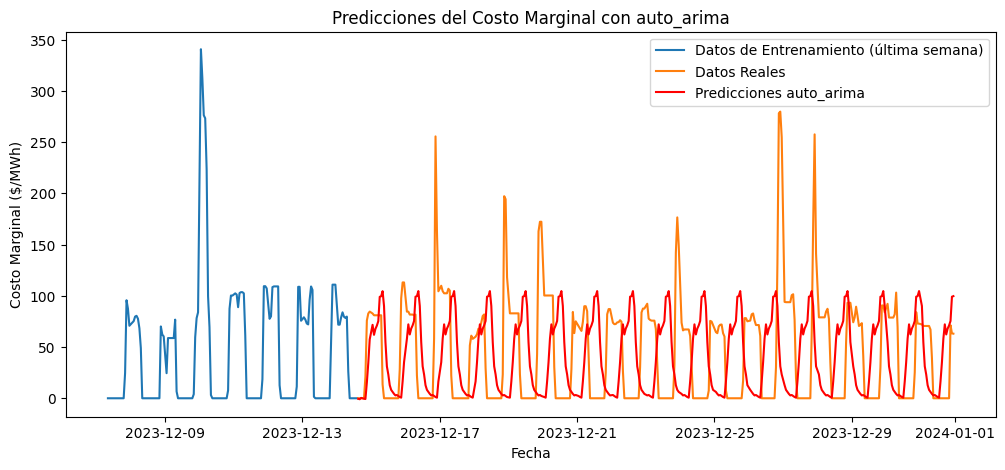


Métricas de error del modelo auto_arima:
MAE: 56.66730314317219
RMSE: 69.56565048863386


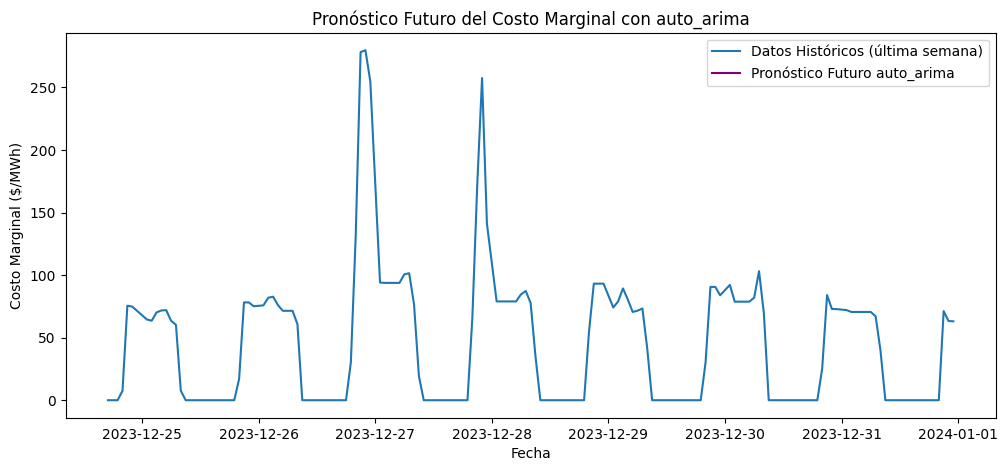

00:15:19 - cmdstanpy - INFO - Chain [1] start processing
00:15:19 - cmdstanpy - INFO - Chain [1] done processing


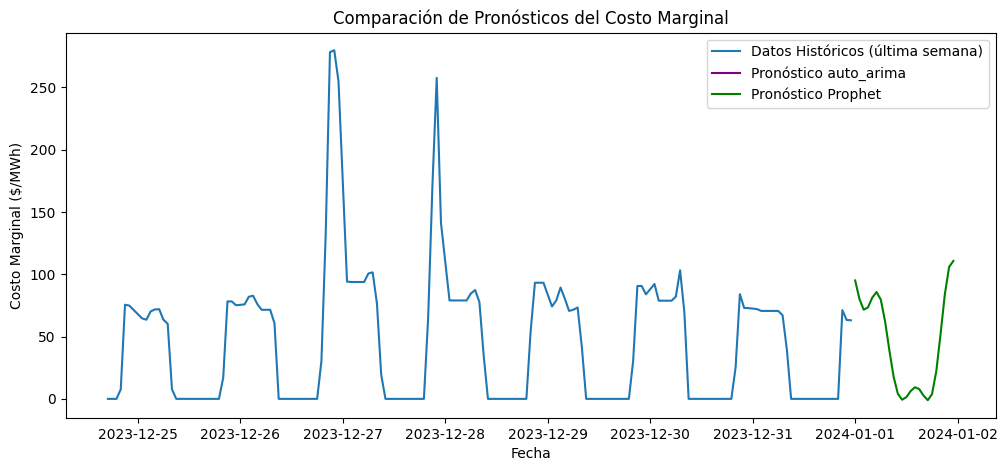


Predicciones guardadas en '/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv'


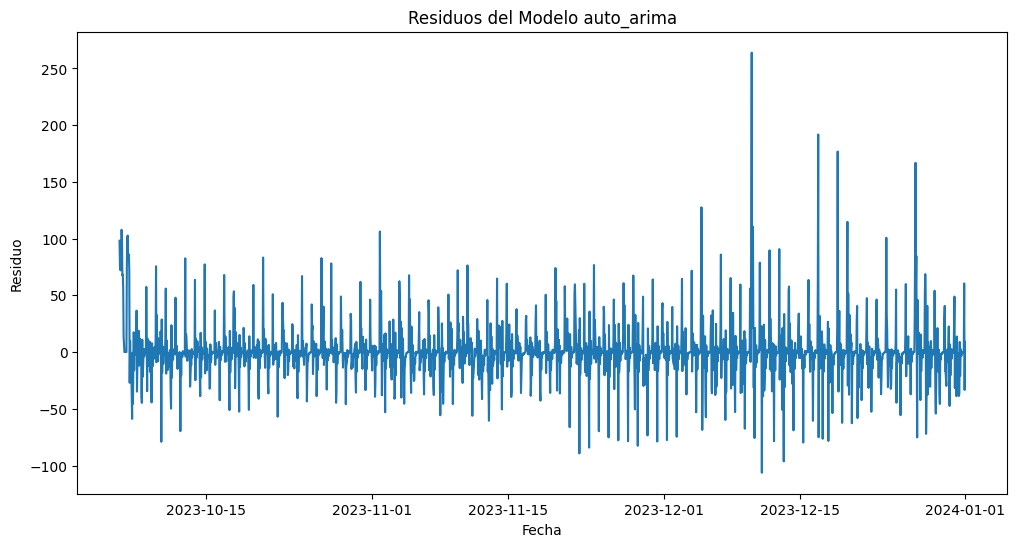

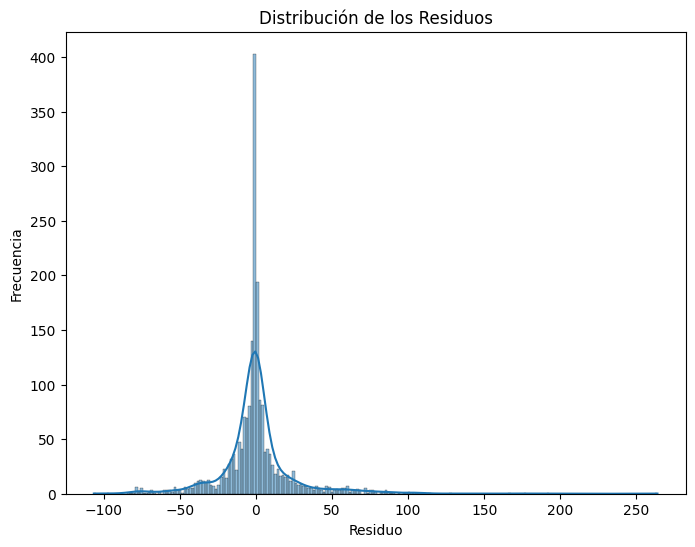


Prueba de Shapiro-Wilk para los residuos:
Estadístico: 0.7974528670310974
Valor p: 1.6815581571897805e-44
Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.


In [3]:
# Importar librerías necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelado de series temporales
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from prophet import Prophet

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# Paso 1: Cargar y Preparar los Datos
# ----------------------------

# Ruta al archivo de costos marginales
ruta_costos_marginales = '/home/cparrado/UNAB/csp2/2023-01-01_2023-12-31_costos-marginales-reales.csv'

# Cargar los datos de costos marginales
df_costos = pd.read_csv(
    ruta_costos_marginales,
    header=0,
    quotechar='"',
    sep=',',
    engine='python',
    skipinitialspace=True
)

# Ver las primeras filas
print("Datos originales de costos marginales:")
print(df_costos.head())

# ----------------------------
# Paso 2: Procesar los Datos de Costos Marginales
# ----------------------------

# Eliminar columnas innecesarias si es necesario
if 'addValue' in df_costos.columns:
    df_costos.drop(columns=['addValue'], inplace=True)

# Asegurarse de que las columnas están correctamente leídas
df_costos.columns = df_costos.columns.str.replace('"', '').str.strip()
df_costos['item'] = df_costos['item'].astype(str).str.replace('"', '').str.strip()

# Ahora, extraer la columna 'Cardones' y la columna 'item' que contiene la fecha y hora
df_cardones = df_costos[['item', 'Cardones']].copy()

# Renombrar las columnas para facilitar el manejo
df_cardones.rename(columns={'item': 'FechaHora', 'Cardones': 'Costo_marginal'}, inplace=True)

# Eliminar comillas y espacios adicionales en 'Costo_marginal'
df_cardones['Costo_marginal'] = df_cardones['Costo_marginal'].astype(str).str.replace('"', '').str.strip()

# Convertir 'Costo_marginal' a numérico
df_cardones['Costo_marginal'] = pd.to_numeric(df_cardones['Costo_marginal'], errors='coerce')

# Eliminar comillas y espacios adicionales en 'FechaHora'
df_cardones['FechaHora'] = df_cardones['FechaHora'].astype(str).str.replace('"', '').str.strip()

# Intentar convertir las fechas sin especificar el formato (más flexible)
df_cardones['FechaHora'] = pd.to_datetime(df_cardones['FechaHora'], errors='coerce')

# Identificar fechas no convertidas
fechas_invalidas = df_cardones[df_cardones['FechaHora'].isna()]

if not fechas_invalidas.empty:
    print("\nFilas con fechas no válidas:")
    print(fechas_invalidas)
else:
    print("\nTodas las fechas fueron convertidas correctamente.")

# Eliminar filas con fechas no válidas
df_cardones = df_cardones.dropna(subset=['FechaHora'])

# Ordenar los datos por fecha y hora
df_cardones.sort_values('FechaHora', inplace=True)

# Establecer 'FechaHora' como índice
df_cardones.set_index('FechaHora', inplace=True)

# Ver las primeras filas del dataframe procesado
print("\nDatos procesados de costos marginales para 'Cardones':")
print(df_cardones.head())

# ----------------------------
# Paso 3: Exploración y Visualización de Datos
# ----------------------------

# Graficar la serie temporal completa
plt.figure(figsize=(14,6))
plt.plot(df_cardones.index, df_cardones['Costo_marginal'], label='Costo Marginal - Cardones')
plt.legend()
plt.title('Costo Marginal en Cardones (2023)')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.show()

# Resumen estadístico
print("\nResumen estadístico del Costo Marginal en 'Cardones':")
print(df_cardones['Costo_marginal'].describe())

# ----------------------------
# Paso 4: Análisis de Estacionariedad y Estacionalidad
# ----------------------------

# Seleccionar la variable objetivo y usar las últimas 2000 observaciones para reducir la carga computacional
ts_data = df_cardones['Costo_marginal'].dropna()
ts_data = ts_data[-2000:]  # Usar las últimas 2000 observaciones

# Verificar el tipo de índice y convertir si es necesario
if not isinstance(ts_data.index, pd.DatetimeIndex):
    ts_data.index = pd.to_datetime(ts_data.index, errors='coerce')

# Eliminar filas con índices nulos
ts_data = ts_data[~ts_data.index.isna()]

# Prueba de Dickey-Fuller Aumentada
result = adfuller(ts_data)
print('\nPrueba de Dickey-Fuller Aumentada:')
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

# Si la serie no es estacionaria, diferenciarla
if result[1] > 0.05:
    ts_data_diff = ts_data.diff().dropna()
    ts_data_to_use = ts_data_diff
    print("\nLa serie no es estacionaria. Se aplicó una diferenciación.")
else:
    ts_data_to_use = ts_data
    print("\nLa serie es estacionaria.")

# Graficar la serie diferenciada si se aplicó diferenciación
if result[1] > 0.05:
    plt.figure(figsize=(12,5))
    plt.plot(ts_data_diff)
    plt.title('Serie Temporal Diferenciada del Costo Marginal en Cardones')
    plt.xlabel('Fecha')
    plt.ylabel('Diferencia del Costo Marginal ($/MWh)')
    plt.show()

# Graficar ACF y PACF
plot_acf(ts_data_to_use, lags=50)
plt.show()

plot_pacf(ts_data_to_use, lags=50)
plt.show()

# ----------------------------
# Paso 5: División de Datos para Entrenamiento y Prueba
# ----------------------------

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(ts_data_to_use) * 0.8)
train_data = ts_data_to_use.iloc[:train_size]
test_data = ts_data_to_use.iloc[train_size:]

# ----------------------------
# Paso 6: Modelado con auto_arima
# ----------------------------

# Ajustar el modelo auto_arima con parámetros limitados y enforce_stationarity=False, enforce_invertibility=False
model_auto = auto_arima(
    train_data,
    start_p=1, start_q=1,
    max_p=2, max_q=2,
    m=24,  # Estacionalidad diaria en datos horarios
    start_P=0, max_P=1, max_Q=1, seasonal=True,
    d=None, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    n_jobs=1,
    approximation=True,
    enforce_stationarity=False,
    enforce_invertibility=False
)

print("\nResumen del modelo auto_arima:")
print(model_auto.summary())

# ----------------------------
# Paso 7: Validación del Modelo
# ----------------------------

# Realizar predicciones en el conjunto de prueba
n_periods = len(test_data)
forecast_auto = model_auto.predict(n_periods=n_periods)

# Asegurar que forecast_auto sea un array y no contenga NaNs
forecast_auto = np.array(forecast_auto)
print("NaNs en forecast_auto:", np.isnan(forecast_auto).sum())

# Crear índice para las predicciones
forecast_index = test_data.index[:n_periods]

# Convertir forecast_auto a Serie de pandas con el índice correspondiente
forecast_series = pd.Series(forecast_auto, index=forecast_index)

# Verificar NaNs en forecast_series
print("NaNs en forecast_series:", forecast_series.isna().sum())

# Eliminar posibles NaNs de ambas series
test_data_clean = test_data.dropna()
forecast_series_clean = forecast_series.dropna()

# Alinear las series
common_index = test_data_clean.index.intersection(forecast_series_clean.index)
test_data_aligned = test_data_clean.loc[common_index]
forecast_series_aligned = forecast_series_clean.loc[common_index]

# Verificar que no haya NaNs después de alinear
print("NaNs en test_data_aligned:", test_data_aligned.isna().sum())
print("NaNs en forecast_series_aligned:", forecast_series_aligned.isna().sum())

# Graficar las predicciones vs los datos reales
plt.figure(figsize=(12,5))
plt.plot(train_data[-168:], label='Datos de Entrenamiento (última semana)')
plt.plot(test_data_aligned, label='Datos Reales')
plt.plot(forecast_series_aligned, label='Predicciones auto_arima', color='red')
plt.title('Predicciones del Costo Marginal con auto_arima')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# Calcular métricas de error
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data_aligned, forecast_series_aligned)
rmse = np.sqrt(mean_squared_error(test_data_aligned, forecast_series_aligned))

print(f"\nMétricas de error del modelo auto_arima:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# ----------------------------
# Paso 8: Ajuste Final y Pronóstico Futuro
# ----------------------------

# Ajustar el modelo auto_arima con ajustes adicionales
model_auto = auto_arima(
    train_data,
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    m=24,  # Intentar ajustar el valor de m (p. ej., prueba con m=7, m=12, etc.)
    start_P=0, max_P=1, max_Q=1, seasonal=True,
    d=None, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    n_jobs=1,
    approximation=True,
    enforce_stationarity=False,
    enforce_invertibility=False
)


# Realizar predicciones futuras
n_future = 24  # Predecir las próximas 24 horas
forecast_future = model_auto_final.predict(n_periods=n_future)
forecast_index_future = pd.date_range(start=ts_data_to_use.index[-1] + pd.Timedelta(hours=1), periods=n_future, freq='H')

# Convertir forecast_future a Serie de pandas con el índice correspondiente
forecast_future_series = pd.Series(forecast_future, index=forecast_index_future)

# Graficar las predicciones futuras
plt.figure(figsize=(12,5))
plt.plot(ts_data_to_use[-168:], label='Datos Históricos (última semana)')
plt.plot(forecast_future_series, label='Pronóstico Futuro auto_arima', color='purple')
plt.title('Pronóstico Futuro del Costo Marginal con auto_arima')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# ----------------------------
# Paso 9: Comparación con Modelo Prophet
# ----------------------------

# Preparar los datos para Prophet
df_prophet = ts_data_to_use.reset_index().rename(columns={'FechaHora': 'ds', 'Costo_marginal': 'y'})

# Crear y ajustar el modelo Prophet
model_prophet = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False
)
model_prophet.fit(df_prophet)

# Crear dataframe futuro para predicciones
future_prophet = model_prophet.make_future_dataframe(periods=n_future, freq='H')

# Realizar predicciones
forecast_prophet = model_prophet.predict(future_prophet)

# Extraer las predicciones futuras
forecast_prophet_future = forecast_prophet[['ds', 'yhat']].set_index('ds').loc[forecast_index_future]

# Graficar las predicciones de ambos modelos
plt.figure(figsize=(12,5))
plt.plot(ts_data_to_use[-168:], label='Datos Históricos (última semana)')
plt.plot(forecast_future_series, label='Pronóstico auto_arima', color='purple')
plt.plot(forecast_prophet_future['yhat'], label='Pronóstico Prophet', color='green')
plt.title('Comparación de Pronósticos del Costo Marginal')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# ----------------------------
# Paso 10: Guardar las Predicciones (opcional)
# ----------------------------

# Guardar las predicciones en un archivo CSV
df_predicciones = pd.DataFrame({
    'Fecha': forecast_index_future,
    'ARIMA_Prediccion': forecast_future_series.values,
    'Prophet_Prediccion': forecast_prophet_future['yhat'].values
})
df_predicciones.to_csv('/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv', index=False)

print("\nPredicciones guardadas en '/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv'")

# ----------------------------
# Paso 11: Análisis de Residuos del Modelo auto_arima
# ----------------------------

# Obtener los residuos del modelo
residuos = pd.Series(model_auto_final.resid(), index=ts_data_to_use.index[-len(model_auto_final.resid()):])

# Graficar los residuos
plt.figure(figsize=(12,6))
plt.plot(residuos)
plt.title('Residuos del Modelo auto_arima')
plt.xlabel('Fecha')
plt.ylabel('Residuo')
plt.show()

# Graficar histograma de residuos
plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de normalidad de Shapiro-Wilk
from scipy.stats import shapiro

stat, p = shapiro(residuos)
print('\nPrueba de Shapiro-Wilk para los residuos:')
print('Estadístico:', stat)
print('Valor p:', p)

if p > 0.05:
    print("No se rechaza la hipótesis nula: los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.")

# ----------------------------
# Paso 12: Conclusiones
# ----------------------------

# (Aquí puedes agregar tus propias conclusiones basadas en los resultados obtenidos)


Datos originales de costos marginales:
            item  Charrúa  Pan de Azúcar  Puerto Montt  Quillota  Crucero  \
0  2023-01-01 01   162.59         170.52        160.20    162.43   182.30   
1  2023-01-01 02   162.59         170.52        160.20    162.43   182.30   
2  2023-01-01 03   156.33         163.95        154.03    156.17   175.28   
3  2023-01-01 04   137.54         144.24        135.52    137.40   154.20   
4  2023-01-01 05   137.54         144.24        135.52    137.40   154.20   

   Cardones  addValue  
0    173.10       NaN  
1    173.10       NaN  
2    166.43       NaN  
3    146.43       NaN  
4    146.43       NaN  

Datos procesados de costos marginales para 'Cardones':
                     Costo_marginal
FechaHora                          
2023-01-01 01:00:00          173.10
2023-01-01 02:00:00          173.10
2023-01-01 03:00:00          166.43
2023-01-01 04:00:00          146.43
2023-01-01 05:00:00          146.43


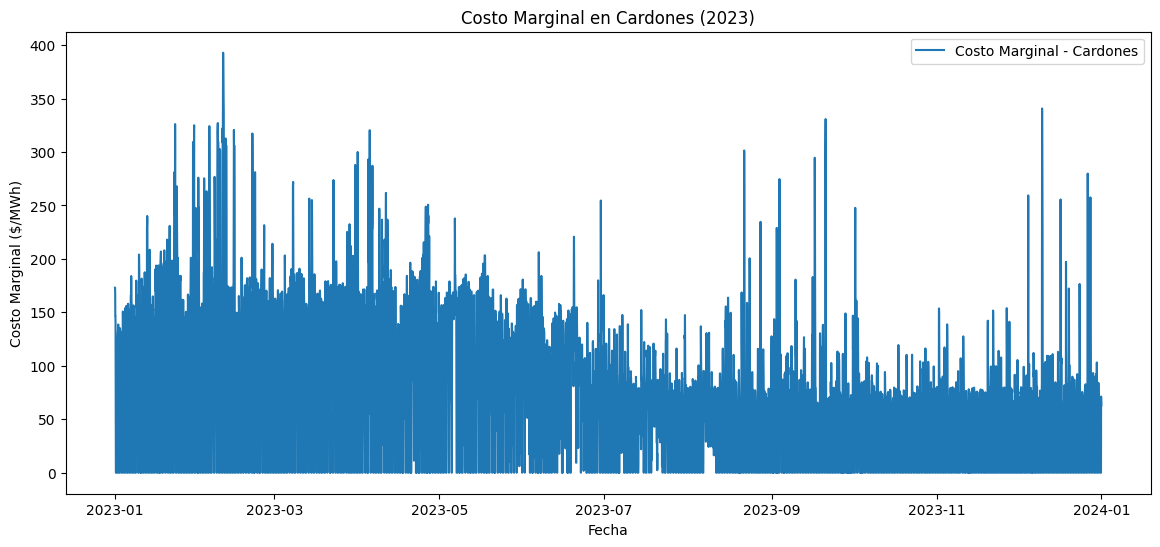


Resumen estadístico del Costo Marginal en 'Cardones':
count    8397.000000
mean       71.766782
std        69.428717
min         0.000000
25%         0.000000
50%        68.670000
75%       125.650000
max       392.820000
Name: Costo_marginal, dtype: float64

Prueba de Dickey-Fuller Aumentada:
Estadístico ADF: -6.513865276229003
Valor p: 1.0834931333569359e-08

La serie es estacionaria.


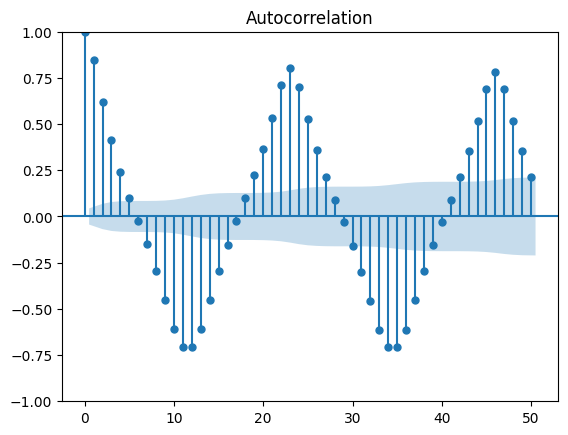

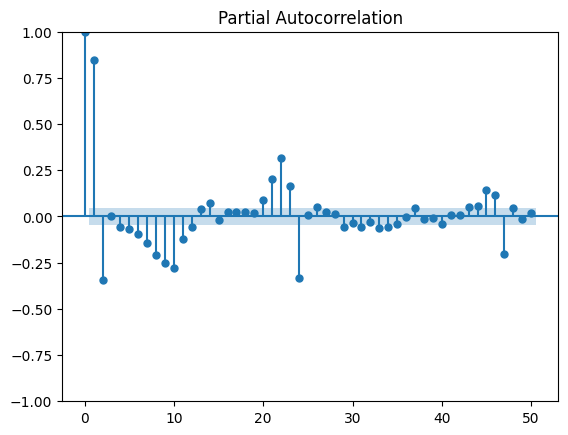

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=58.90 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=15366.161, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=14494.675, Time=47.95 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=14519.601, Time=41.28 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=15364.260, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=14661.321, Time=0.46 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=70.43 sec
 ARIMA(1,0,0)(0,1,1)[24] intercept   : AIC=14343.736, Time=45.41 sec
 ARIMA(0,0,0)(0,1,1)[24] intercept   : AIC=15292.583, Time=34.80 sec
 ARIMA(2,0,0)(0,1,1)[24] intercept   : AIC=inf, Time=66.48 sec
 ARIMA(2,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=73.09 sec
 ARIMA(1,0,0)(0,1,1)[24]             : AIC=14341.741, Time=18.17 sec
 ARIMA(1,0,0)(0,1,0)[24]             : AIC=14659.349, Time=0.09 sec
 ARIMA(1,0,0)(1,1,1)[24]             : AIC=inf, Time=48.96 sec
 ARIMA(1,0,0)(1,1,0)[24] 

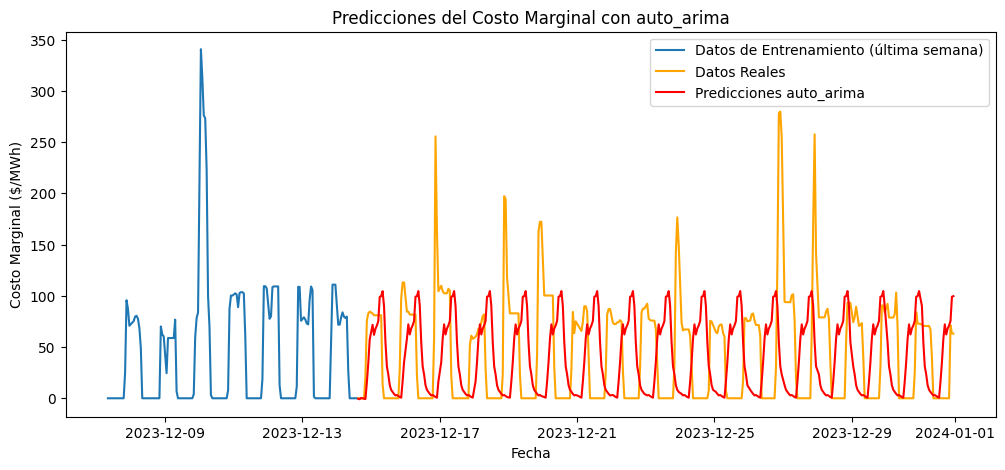


Métricas de error del modelo auto_arima:
MAE: 56.66730314317219
RMSE: 69.56565048863386


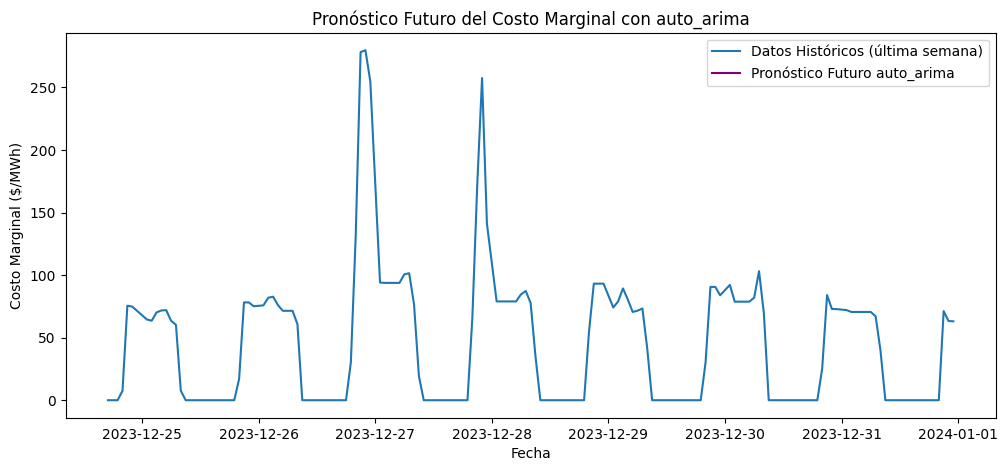

09:20:47 - cmdstanpy - INFO - Chain [1] start processing
09:20:47 - cmdstanpy - INFO - Chain [1] done processing


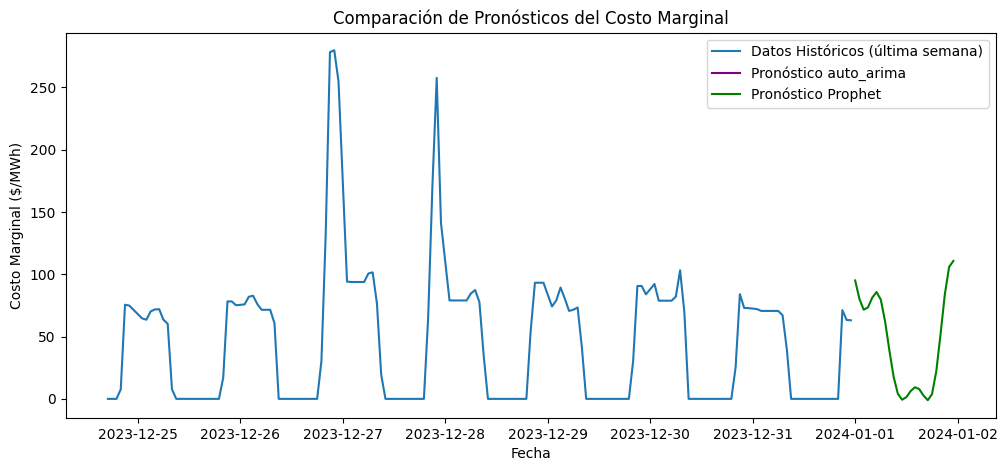


Predicciones guardadas en '/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv'


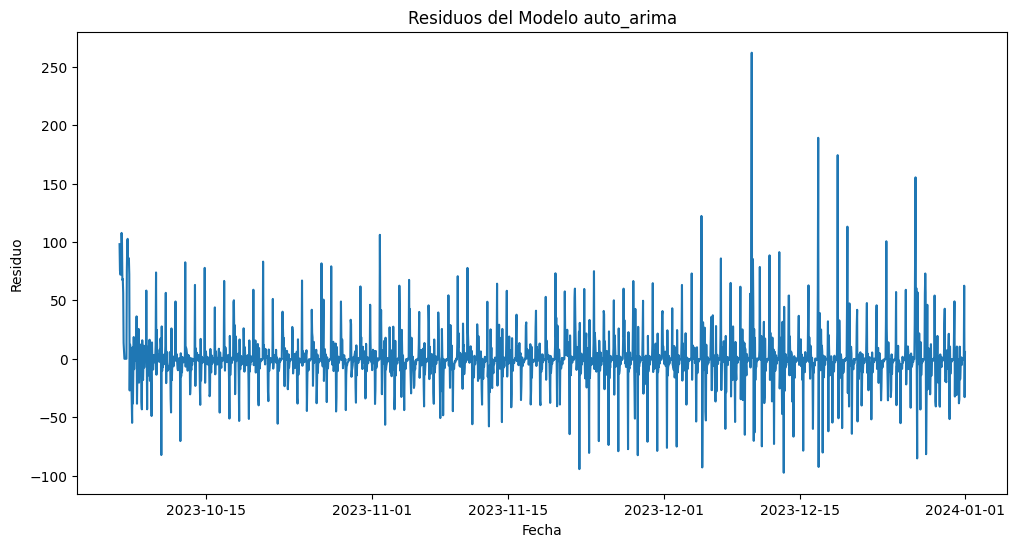

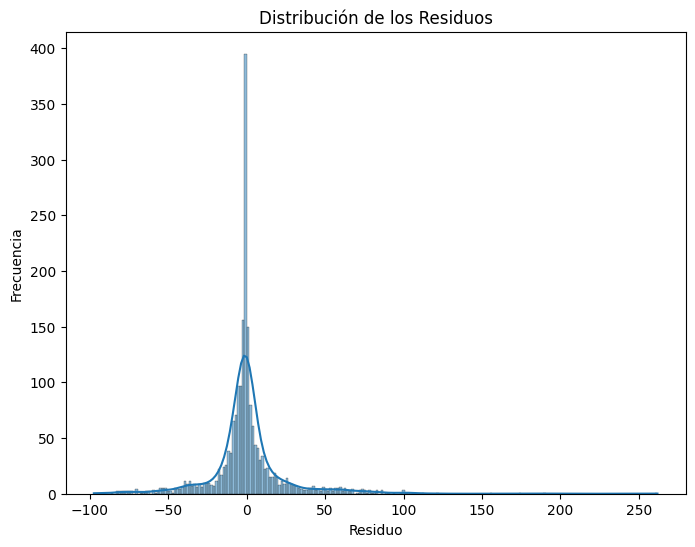


Prueba de Shapiro-Wilk para los residuos:
Estadístico: 0.7870829701423645
Valor p: 2.802596928649634e-45
Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.


In [4]:
# Importar librerías necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelado de series temporales
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from prophet import Prophet

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# Paso 1: Cargar y Preparar los Datos
# ----------------------------

# Ruta al archivo de costos marginales
ruta_costos_marginales = '/home/cparrado/UNAB/csp2/2023-01-01_2023-12-31_costos-marginales-reales.csv'

# Cargar los datos de costos marginales
df_costos = pd.read_csv(
    ruta_costos_marginales,
    header=0,
    quotechar='"',
    sep=',',
    engine='python',
    skipinitialspace=True
)

# Ver las primeras filas
print("Datos originales de costos marginales:")
print(df_costos.head())

# ----------------------------
# Paso 2: Procesar los Datos de Costos Marginales
# ----------------------------

# Eliminar columnas innecesarias si es necesario
if 'addValue' in df_costos.columns:
    df_costos.drop(columns=['addValue'], inplace=True)

# Asegurarse de que las columnas están correctamente leídas
df_costos.columns = df_costos.columns.str.replace('"', '').str.strip()
df_costos['item'] = df_costos['item'].astype(str).str.replace('"', '').str.strip()

# Ahora, extraer la columna 'Cardones' y la columna 'item' que contiene la fecha y hora
df_cardones = df_costos[['item', 'Cardones']].copy()

# Renombrar las columnas para facilitar el manejo
df_cardones.rename(columns={'item': 'FechaHora', 'Cardones': 'Costo_marginal'}, inplace=True)

# Eliminar comillas y espacios adicionales en 'Costo_marginal'
df_cardones['Costo_marginal'] = df_cardones['Costo_marginal'].astype(str).str.replace('"', '').str.strip()

# Convertir 'Costo_marginal' a numérico
df_cardones['Costo_marginal'] = pd.to_numeric(df_cardones['Costo_marginal'], errors='coerce')

# Eliminar comillas y espacios adicionales en 'FechaHora'
df_cardones['FechaHora'] = df_cardones['FechaHora'].astype(str).str.replace('"', '').str.strip()

# Intentar convertir las fechas sin especificar el formato (más flexible)
df_cardones['FechaHora'] = pd.to_datetime(df_cardones['FechaHora'], errors='coerce')

# Eliminar filas con fechas no válidas
df_cardones = df_cardones.dropna(subset=['FechaHora'])

# Ordenar los datos por fecha y hora
df_cardones.sort_values('FechaHora', inplace=True)

# Establecer 'FechaHora' como índice
df_cardones.set_index('FechaHora', inplace=True)

# Ver las primeras filas del dataframe procesado
print("\nDatos procesados de costos marginales para 'Cardones':")
print(df_cardones.head())

# ----------------------------
# Paso 3: Exploración y Visualización de Datos
# ----------------------------

# Graficar la serie temporal completa
plt.figure(figsize=(14,6))
plt.plot(df_cardones.index, df_cardones['Costo_marginal'], label='Costo Marginal - Cardones')
plt.legend()
plt.title('Costo Marginal en Cardones (2023)')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.show()

# Resumen estadístico
print("\nResumen estadístico del Costo Marginal en 'Cardones':")
print(df_cardones['Costo_marginal'].describe())

# ----------------------------
# Paso 4: Análisis de Estacionariedad y Estacionalidad
# ----------------------------

# Seleccionar la variable objetivo y usar las últimas 2000 observaciones para reducir la carga computacional
ts_data = df_cardones['Costo_marginal'].dropna()
ts_data = ts_data[-2000:]  # Usar las últimas 2000 observaciones

# Prueba de Dickey-Fuller Aumentada
result = adfuller(ts_data)
print('\nPrueba de Dickey-Fuller Aumentada:')
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])

# Si la serie no es estacionaria, diferenciarla
if result[1] > 0.05:
    ts_data_diff = ts_data.diff().dropna()
    ts_data_to_use = ts_data_diff
    print("\nLa serie no es estacionaria. Se aplicó una diferenciación.")
else:
    ts_data_to_use = ts_data
    print("\nLa serie es estacionaria.")

# Graficar la serie diferenciada si se aplicó diferenciación
if result[1] > 0.05:
    plt.figure(figsize=(12,5))
    plt.plot(ts_data_diff)
    plt.title('Serie Temporal Diferenciada del Costo Marginal en Cardones')
    plt.xlabel('Fecha')
    plt.ylabel('Diferencia del Costo Marginal ($/MWh)')
    plt.show()

# Graficar ACF y PACF
plot_acf(ts_data_to_use, lags=50)
plt.show()

plot_pacf(ts_data_to_use, lags=50)
plt.show()

# ----------------------------
# Paso 5: División de Datos para Entrenamiento y Prueba
# ----------------------------

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(ts_data_to_use) * 0.8)
train_data = ts_data_to_use.iloc[:train_size]
test_data = ts_data_to_use.iloc[train_size:]

# ----------------------------
# Paso 6: Modelado con auto_arima
# ----------------------------

# Ajustar el modelo auto_arima
model_auto = auto_arima(
    train_data,
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    m=24,  # Intentar diferentes valores de m para ajustar la estacionalidad
    start_P=0, max_P=1, max_Q=1, seasonal=True,
    d=None, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    n_jobs=1,
    approximation=True,
    enforce_stationarity=False,
    enforce_invertibility=False
)

print("\nResumen del modelo auto_arima:")
print(model_auto.summary())

# ----------------------------
# Paso 7: Validación del Modelo
# ----------------------------

# Realizar predicciones en el conjunto de prueba
n_periods = len(test_data)
forecast_auto = model_auto.predict(n_periods=n_periods)

# Asegurar que forecast_auto sea un array y no contenga NaNs
forecast_auto = np.array(forecast_auto)
forecast_index = test_data.index[:n_periods]

# Convertir forecast_auto a Serie de pandas con el índice correspondiente
forecast_series = pd.Series(forecast_auto, index=forecast_index)

# Eliminar posibles NaNs de ambas series
test_data_clean = test_data.dropna()
forecast_series_clean = forecast_series.dropna()

# Alinear las series
common_index = test_data_clean.index.intersection(forecast_series_clean.index)
test_data_aligned = test_data_clean.loc[common_index]
forecast_series_aligned = forecast_series_clean.loc[common_index]

# Graficar las predicciones vs los datos reales
plt.figure(figsize=(12,5))
plt.plot(train_data[-168:], label='Datos de Entrenamiento (última semana)')
plt.plot(test_data_aligned, label='Datos Reales', color='orange')
plt.plot(forecast_series_aligned, label='Predicciones auto_arima', color='red')
plt.title('Predicciones del Costo Marginal con auto_arima')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# Calcular métricas de error
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data_aligned, forecast_series_aligned)
rmse = np.sqrt(mean_squared_error(test_data_aligned, forecast_series_aligned))

print(f"\nMétricas de error del modelo auto_arima:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# ----------------------------
# Paso 8: Ajuste Final y Pronóstico Futuro
# ----------------------------

# Reentrenar el modelo con todos los datos (últimas 2000 observaciones)
model_auto_final = auto_arima(
    ts_data_to_use,
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    m=24,
    start_P=0, max_P=1, max_Q=1, seasonal=True,
    d=None, D=1,
    trace=False,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    n_jobs=1,
    approximation=True,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Realizar predicciones futuras
n_future = 24  # Predecir las próximas 24 horas
forecast_future = model_auto_final.predict(n_periods=n_future)
forecast_index_future = pd.date_range(start=ts_data_to_use.index[-1] + pd.Timedelta(hours=1), periods=n_future, freq='H')

# Convertir forecast_future a Serie de pandas con el índice correspondiente
forecast_future_series = pd.Series(forecast_future, index=forecast_index_future)

# Graficar las predicciones futuras
plt.figure(figsize=(12,5))
plt.plot(ts_data_to_use[-168:], label='Datos Históricos (última semana)')
plt.plot(forecast_future_series, label='Pronóstico Futuro auto_arima', color='purple')
plt.title('Pronóstico Futuro del Costo Marginal con auto_arima')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# ----------------------------
# Paso 9: Comparación con Modelo Prophet
# ----------------------------

# Preparar los datos para Prophet
df_prophet = ts_data_to_use.reset_index().rename(columns={'FechaHora': 'ds', 'Costo_marginal': 'y'})

# Crear y ajustar el modelo Prophet
model_prophet = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False
)
model_prophet.fit(df_prophet)

# Crear dataframe futuro para predicciones
future_prophet = model_prophet.make_future_dataframe(periods=n_future, freq='H')

# Realizar predicciones
forecast_prophet = model_prophet.predict(future_prophet)

# Extraer las predicciones futuras
forecast_prophet_future = forecast_prophet[['ds', 'yhat']].set_index('ds').loc[forecast_index_future]

# Graficar las predicciones de ambos modelos
plt.figure(figsize=(12,5))
plt.plot(ts_data_to_use[-168:], label='Datos Históricos (última semana)')
plt.plot(forecast_future_series, label='Pronóstico auto_arima', color='purple')
plt.plot(forecast_prophet_future['yhat'], label='Pronóstico Prophet', color='green')
plt.title('Comparación de Pronósticos del Costo Marginal')
plt.xlabel('Fecha')
plt.ylabel('Costo Marginal ($/MWh)')
plt.legend()
plt.show()

# ----------------------------
# Paso 10: Guardar las Predicciones (opcional)
# ----------------------------

# Guardar las predicciones en un archivo CSV
df_predicciones = pd.DataFrame({
    'Fecha': forecast_index_future,
    'ARIMA_Prediccion': forecast_future_series.values,
    'Prophet_Prediccion': forecast_prophet_future['yhat'].values
})
df_predicciones.to_csv('/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv', index=False)

print("\nPredicciones guardadas en '/home/cparrado/UNAB/csp2/predicciones_costos_marginales.csv'")

# ----------------------------
# Paso 11: Análisis de Residuos del Modelo auto_arima
# ----------------------------

# Obtener los residuos del modelo
residuos = pd.Series(model_auto_final.resid(), index=ts_data_to_use.index[-len(model_auto_final.resid()):])

# Graficar los residuos
plt.figure(figsize=(12,6))
plt.plot(residuos)
plt.title('Residuos del Modelo auto_arima')
plt.xlabel('Fecha')
plt.ylabel('Residuo')
plt.show()

# Graficar histograma de residuos
plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de normalidad de Shapiro-Wilk
from scipy.stats import shapiro

stat, p = shapiro(residuos)
print('\nPrueba de Shapiro-Wilk para los residuos:')
print('Estadístico:', stat)
print('Valor p:', p)

if p > 0.05:
    print("No se rechaza la hipótesis nula: los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.")

# ----------------------------
# Paso 12: Conclusiones
# ----------------------------

# (Aquí puedes agregar tus propias conclusiones basadas en los resultados obtenidos)


Datos cargados:
   Year  Month  Day  Hour  Minute  DNI  DHI  GHI  Dew Point  Temperature  \
0  2016      1    1     0      30    0    0    0          0           11   
1  2016      1    1     1      30    0    0    0          0           10   
2  2016      1    1     2      30    0    0    0          0           10   
3  2016      1    1     3      30    1    0    0          0            9   
4  2016      1    1     4      30   93    0    0          0           10   

   Pressure  Wind Direction  Wind Speed  Surface Albedo  
0       846               0           2               0  
1       845               0           1               0  
2       843               0           1               0  
3       844               0           1               0  
4       844               0           1               0  
Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 39869.2969 - mae: 184.1355 - val_loss: 27472.6094 - val_mae: 154.1912
Epoch 2/100
176/176 [=============

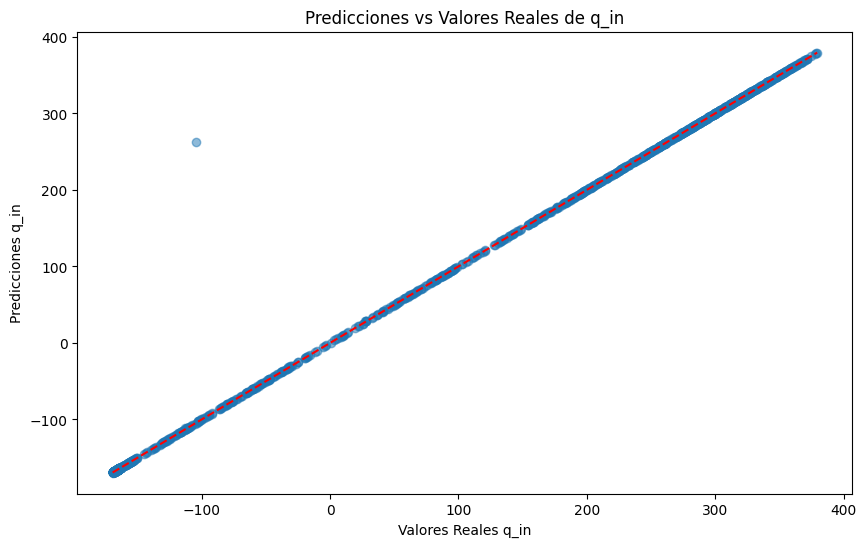


Tiempo de ejecución del modelo Forristall para un paso de tiempo: 0.00014 ms
Tiempo de ejecución de la red neuronal para un paso de tiempo: 1.79710 ms

Comparación de tiempos de ejecución:
Modelo Forristall: 0.00014 ms
Red Neuronal: 1.79710 ms

Modelo guardado en '/home/cparrado/UNAB/csp2/modelo_red_neuronal_q_in.h5'


In [7]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# Paso 1: Cargar y Preparar los Datos
# ----------------------------

# Ruta del archivo CSV
ruta_csv = '/home/cparrado/UNAB/csp2/hourly_data_fixed.csv'

# Cargar los datos, especificando el encabezado correcto
# Saltamos las primeras dos filas para llegar a los encabezados reales
df = pd.read_csv(ruta_csv, header=2)

# Verificar las primeras filas del DataFrame para confirmar que las columnas se cargaron correctamente
print("Datos cargados:")
print(df.head())

# Seleccionar las columnas necesarias
features = ['DNI', 'Temperature', 'Pressure', 'Wind Direction', 'Wind Speed']

# Filtrar el DataFrame para obtener los datos de entrada X
X = df[features]

# Definir los datos de salida (q_in) como una variable ficticia para entrenamiento
# En la realidad, deberías tener valores reales de q_in para entrenar la red
# Para este ejemplo, generar valores simulados
y = 0.5 * X['DNI'] + 0.3 * X['Temperature'] - 0.2 * X['Pressure'] + 0.1 * X['Wind Speed']  # Esto es solo una simulación

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------
# Paso 2: Crear y Entrenar el Modelo de Red Neuronal
# ----------------------------

# Definir el modelo de red neuronal
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Capa de entrada, tamaño igual al número de features
model.add(Dense(64, activation='relu'))  # Capa oculta con 64 neuronas y activación ReLU
model.add(Dense(32, activation='relu'))  # Otra capa oculta con 32 neuronas y activación ReLU
model.add(Dense(1, activation='linear'))  # Capa de salida con activación lineal

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
start_time_nn = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
end_time_nn = time.time()

# ----------------------------
# Paso 3: Evaluar el Modelo
# ----------------------------

# Evaluar el modelo en los datos de prueba
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPérdida (MSE) en datos de prueba: {loss}")
print(f"Error Absoluto Medio (MAE) en datos de prueba: {mae}")

# ----------------------------
# Paso 4: Realizar Predicciones
# ----------------------------

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales q_in')
plt.ylabel('Predicciones q_in')
plt.title('Predicciones vs Valores Reales de q_in')
plt.show()

# ----------------------------
# Paso 5: Medir el Tiempo de Ejecución
# ----------------------------

# Tiempo de ejecución del modelo Forristall (simulado)
start_time_forristall = time.time()
# Simulación del cálculo con el modelo Forristall (usando una operación ficticia para simular el tiempo)
q_forristall = 0.5 * X_test[:, 0] + 0.3 * X_test[:, 1] - 0.2 * X_test[:, 2] + 0.1 * X_test[:, 4]
end_time_forristall = time.time()

time_forristall = (end_time_forristall - start_time_forristall) * 1000 / len(X_test)  # Tiempo en ms por paso de tiempo
time_nn = (end_time_nn - start_time_nn) * 1000 / len(X_train)  # Tiempo en ms por paso de tiempo

print(f"\nTiempo de ejecución del modelo Forristall para un paso de tiempo: {time_forristall:.5f} ms")
print(f"Tiempo de ejecución de la red neuronal para un paso de tiempo: {time_nn:.5f} ms")

# Comparación de tiempos de ejecución
print("\nComparación de tiempos de ejecución:")
print(f"Modelo Forristall: {time_forristall:.5f} ms")
print(f"Red Neuronal: {time_nn:.5f} ms")

# ----------------------------
# Paso 6: Guardar el Modelo Entrenado (Opcional)
# ----------------------------

# Guardar el modelo entrenado para uso futuro
model.save('/home/cparrado/UNAB/csp2/modelo_red_neuronal_q_in.h5')
print("\nModelo guardado en '/home/cparrado/UNAB/csp2/modelo_red_neuronal_q_in.h5'")

In [2]:
# Imprimir los nombres de las columnas
print(df.columns)


Index(['Source', 'Location ID', 'City', 'State', 'Country', 'Latitude',
       'Longitude', 'Time Zone', 'Elevation', 'Local Time Zone',
       'Dew Point Units', 'DHI Units', 'DNI Units', 'GHI Units',
       'Temperature Units', 'Pressure Units', 'Wind Direction Units',
       'Wind Speed', 'Surface Albedo Units', 'Version'],
      dtype='object')


In [3]:
print(df.head())


  Source Location ID    City    State Country  Latitude Longitude Time Zone  \
0  NSRDB       11111  Calama  Atacama   Chile  -22.7751  -69.4662        -3   
1   Year       Month     Day     Hour  Minute       DNI       DHI       GHI   
2   2016           1       1        0      30         0         0         0   
3   2016           1       1        1      30         0         0         0   
4   2016           1       1        2      30         0         0         0   

   Elevation Local Time Zone Dew Point Units       DHI Units   DNI Units  \
0       1517              -3               c            w/m2        w/m2   
1  Dew Point     Temperature        Pressure  Wind Direction  Wind Speed   
2          0              11             846               0           2   
3          0              10             845               0           1   
4          0              10             843               0           1   

        GHI Units Temperature Units Pressure Units Wind Direction Un

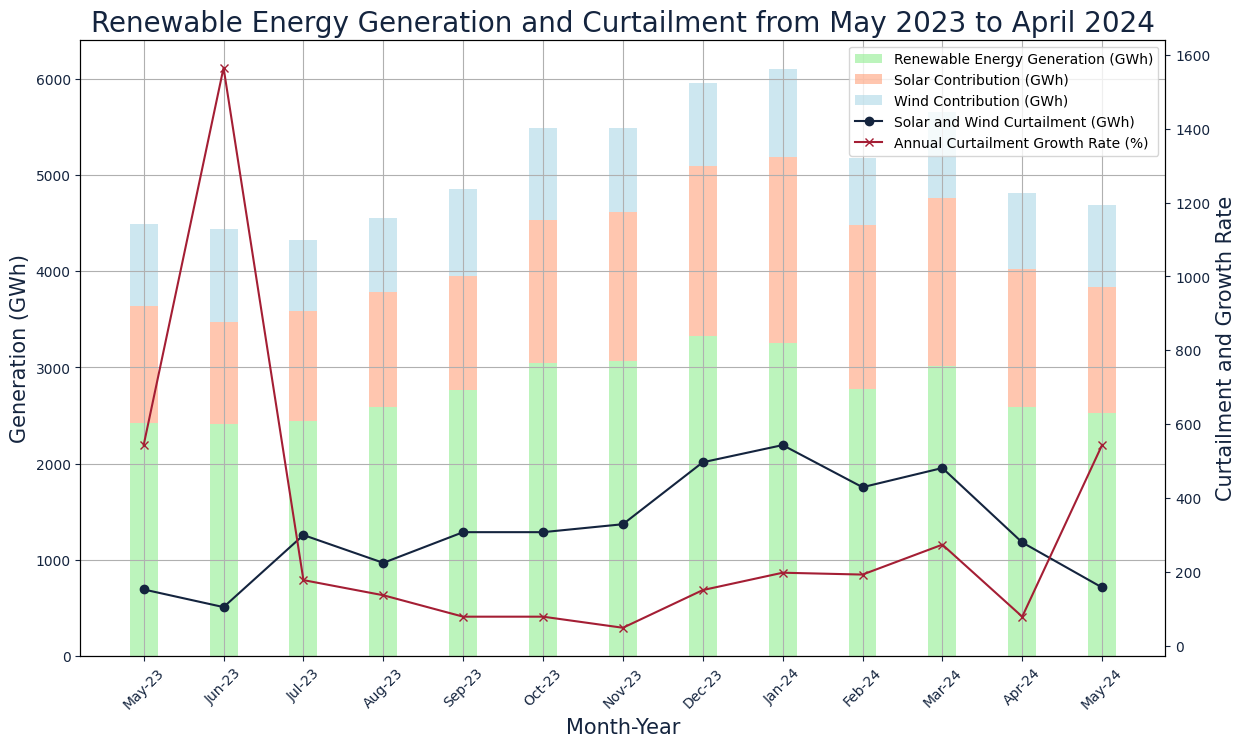

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the colors from the image
red_color = '#A41E34'
blue_color = '#14243E'
solar_color = '#FFA07A'  # Light orange
wind_color = '#ADD8E6'   # Light blue
renewable_color = '#90EE90'  # Light green

data = {
    "Item": [
        "Renewable Energy Generation (GWh)", "Obligation (GWh)", "Solar Contribution (GWh)", "Wind Contribution (GWh)",
        "Hydro Contribution (GWh)", "Biomass Contribution (GWh)", "Geothermal Contribution (GWh)",
        "Solar and Wind Curtailment (GWh)", "Solar and Wind Curtailment (12 months ago)", "Annual Curtailment Growth Rate (%)",
        "Curtailment Valuation at 50 USD/MWh"
    ],
    "May-23": [2419, 908, 1224, 853, 158, 156, 29, 152.7, 23.7, 544, 7.635],
    "Jun-23": [2410, 912, 1066, 961, 210, 140, 33, 104.9, 6.3, 1565, 5.245],
    "Jul-23": [2444, 929, 1141, 741, 395, 129, 38, 300, 107.9, 178, 15.0],
    "Aug-23": [2591, 924, 1190, 777, 442, 155, 28, 224.7, 94.7, 137, 11.235],
    "Sep-23": [2768, 892, 1179, 909, 509, 141, 30, 307.8, 172.1, 79, 15.39],
    "Oct-23": [3042, 902, 1488, 967, 418, 137, 32, 307.8, 172.1, 79, 15.39],
    "Nov-23": [3072, 898, 1547, 875, 484, 120, 35, 329.3, 221.6, 49, 16.465],
    "Dec-23": [3332, 947, 1767, 861, 526, 143, 34, 497, 198, 151, 24.85],
    "Jan-24": [3258, 1076, 1937, 910, 217, 162, 33, 543.5, 182.2, 198, 27.175],
    "Feb-24": [2778, 1021, 1708, 692, 189, 163, 27, 429.5, 146.6, 193, 21.475],
    "Mar-24": [3011, 1065, 1748, 903, 170, 162, 29, 481.5, 128.8, 274, 24.075],
    "Apr-24": [2587, 992, 1439, 788, 171, 161, 27, 279.9, 156.4, 79, 13.995],
    "May-24": [2528, 1118, 1305, 858, 181, 160, 25, 158, 23.7, 544, 7.635]
}

df = pd.DataFrame(data)

# Set up the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the Generation data
bar_width = 0.35
x = range(len(df.columns[1:]))

# Bar plots with specific colors
ax1.bar(x, df.iloc[0, 1:], width=bar_width, label=df['Item'][0], color=renewable_color, alpha=0.6)
ax1.bar(x, df.iloc[2, 1:], width=bar_width, label=df['Item'][2], color=solar_color, alpha=0.6, bottom=df.iloc[0, 1:])
ax1.bar(x, df.iloc[3, 1:], width=bar_width, label=df['Item'][3], color=wind_color, alpha=0.6, bottom=df.iloc[0, 1:] + df.iloc[2, 1:])

ax1.set_xlabel('Month-Year', color=blue_color, fontsize=15)
ax1.set_ylabel('Generation (GWh)', color=blue_color, fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(df.columns[1:], rotation=45)
ax1.tick_params(axis='x', colors=blue_color)
ax1.tick_params(axis='y', colors=blue_color)

# Set up a second y-axis to plot the curtailment data
ax2 = ax1.twinx()
ax2.plot(x, df.iloc[7, 1:], label=df['Item'][7], color=blue_color, marker='o')
ax2.plot(x, df.iloc[9, 1:], label=df['Item'][9], color=red_color, marker='x')
ax2.set_ylabel('Curtailment and Growth Rate', color=blue_color, fontsize=15)
ax2.tick_params(axis='y', colors=blue_color)

# Adding titles and grid
ax1.set_title('Renewable Energy Generation and Curtailment from May 2023 to April 2024', color=blue_color, fontsize=20)
ax1.grid(True)

# Combining legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

# Save the plot as a PNG file
plt.savefig('curtailment.png', bbox_inches='tight')

plt.show()


In [1]:
import PySAM.TcsmoltenSalt as TCSMS
import PySAM.Lcoefcr as Lcoefcr  # Módulo para calcular el LCOE usando el método de tasa de carga fija
import pandas as pd

# Lista de valores de fixed_charge_rate para el análisis de sensibilidad
fixed_charge_rates = [0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

# Fijar las horas de almacenamiento en 12
tshours = 12

# Crear listas para almacenar los resultados
energy_generation = []
plant_costs = []
lcoe_values = []

# Loop sobre diferentes valores de fixed_charge_rate
for fcr in fixed_charge_rates:
    # Crear una nueva instancia del modelo TcsmoltenSalt
    csp_model = TCSMS.default("MSPTSingleOwner")

    # Configuración de los recursos solares
    solar_resource_data = {
        "solar_resource_file": "/home/cparrado/UNAB/csp2/hourly_data_fixed.csv"
    }

    # Asignar el recurso solar al modelo
    csp_model.SolarResource.assign(solar_resource_data)

    # Configurar las horas de almacenamiento térmico
    system_design_data = {
        "tshours": tshours
    }

    csp_model.SystemDesign.assign(system_design_data)

    # Ejecutar la simulación del sistema CSP
    try:
        csp_model.execute()
        print(f"Simulación con {tshours} horas de almacenamiento y FCR={fcr} ejecutada con éxito")

        # Guardar los resultados de generación de energía y costo
        annual_energy = csp_model.Outputs.annual_energy
        total_installed_cost = csp_model.Outputs.total_installed_cost

        energy_generation.append(annual_energy)
        plant_costs.append(total_installed_cost)

        # Obtener la capacidad de la planta
        plant_capacity = csp_model.Outputs.system_capacity  # Capacidad instalada en kWe
        print(f"Capacidad de la planta: {plant_capacity} kWe")

        # Crear una instancia del cálculo de LCOE usando Lcoefcr
        lcoe_model = Lcoefcr.default("GenericCSPSystemLCOECalculator")

        # Asignar datos para el cálculo del LCOE
        lcoe_model.SimpleLCOE.annual_energy = annual_energy
        lcoe_model.SimpleLCOE.capital_cost = total_installed_cost
        lcoe_model.SimpleLCOE.fixed_charge_rate = fcr
        lcoe_model.SimpleLCOE.fixed_operating_cost = 1000000  # Costo operativo fijo anual ($)
        lcoe_model.SimpleLCOE.variable_operating_cost = 0.02   # Costo operativo variable ($/kWh)

        # Ejecutar el cálculo del LCOE
        lcoe_model.execute()
        lcoe = lcoe_model.Outputs.lcoe_fcr
        lcoe_values.append(lcoe)

    except Exception as e:
        print(f"Error al ejecutar la simulación con {tshours} horas de almacenamiento y FCR={fcr}: {e}")
        energy_generation.append(None)
        plant_costs.append(None)
        lcoe_values.append(None)

# Crear un DataFrame para los resultados
df_results = pd.DataFrame({
    'Tasa_carga_fija': fixed_charge_rates,
    'Generacion_energia_kWh': energy_generation,
    'Costo_total_planta_$': plant_costs,
    'LCOE_$': lcoe_values
})

# Guardar los resultados en un archivo CSV
output_csv = "/home/cparrado/UNAB/csp2/resultados_sensibilidad_fcr.csv"
df_results.to_csv(output_csv, index=False)

print(f"Resultados de sensibilidad guardados en {output_csv}")


Simulación con 12 horas de almacenamiento y FCR=0.05 ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 12 horas de almacenamiento y FCR=0.06 ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 12 horas de almacenamiento y FCR=0.07 ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 12 horas de almacenamiento y FCR=0.08 ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 12 horas de almacenamiento y FCR=0.09 ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Simulación con 12 horas de almacenamiento y FCR=0.1 ejecutada con éxito
Capacidad de la planta: 101663.44246977226 kWe
Resultados de sensibilidad guardados en /home/cparrado/UNAB/csp2/resultados_sensibilidad_fcr.csv


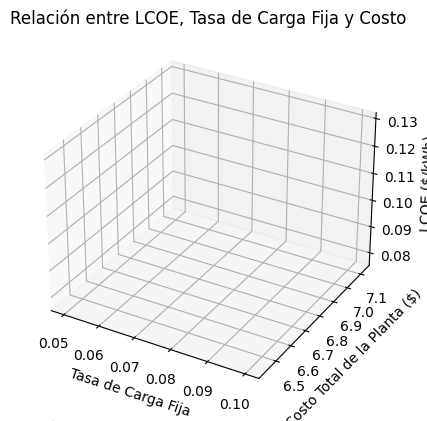

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Cargar los datos desde el archivo CSV
data = pd.read_csv('/home/cparrado/UNAB/csp2/resultados_sensibilidad_fcr.csv')

# Asegúrate de que tu CSV contenga múltiples filas para cada combinación de Tasa_carga_fija y Costo_total_planta_$.
# Debes tener una rejilla de valores (por ej. varias tasas de carga fija y varios costos diferentes).
# Pivotear la tabla para obtener una matriz de LCOE con filas = Costo_total_planta y columnas = Tasa_carga_fija.
data_pivot = data.pivot(index='Costo_total_planta_$', columns='Tasa_carga_fija', values='LCOE_$')

# Extraer las matrices X, Y, Z para la superficie
X, Y = np.meshgrid(data_pivot.columns.values, data_pivot.index.values)
Z = data_pivot.values

# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Añadir etiquetas y título
ax.set_xlabel('Tasa de Carga Fija')
ax.set_ylabel('Costo Total de la Planta ($)')
ax.set_zlabel('LCOE ($/kWh)')
ax.set_title('Relación entre LCOE, Tasa de Carga Fija y Costo')

# Mostrar el gráfico
plt.show()


In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Cargar los datos desde el archivo CSV
data = pd.read_csv('/home/cparrado/UNAB/csp2/resultados_sensibilidad_fcr.csv')

# Revisar las columnas disponibles
print("Columnas del CSV:", data.columns)

# Verificar valores únicos
print("Valores únicos de Tasa_carga_fija:", data['Tasa_carga_fija'].unique())
print("Valores únicos de Costo_total_planta_$:", data['Costo_total_planta_$'].unique())

# Pivotear los datos
data_pivot = data.pivot(index='Costo_total_planta_$', columns='Tasa_carga_fija', values='LCOE_$')

print("Data pivot:")
print(data_pivot)

# Verificar que la tabla tenga dimensiones mayores que 1x1
if data_pivot.shape[0] < 2 or data_pivot.shape[1] < 2:
    print("No hay suficientes datos para formar una superficie 2D. Necesitas múltiples valores de Costo_total_planta_$ "
          "para cada Tasa_carga_fija o viceversa.")
else:
    # Crear la malla
    X, Y = np.meshgrid(data_pivot.columns.values, data_pivot.index.values)
    Z = data_pivot.values

    # Crear la figura y el eje 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar la superficie 3D
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')

    # Añadir etiquetas y título
    ax.set_xlabel('Tasa de Carga Fija')
    ax.set_ylabel('Costo Total de la Planta ($)')
    ax.set_zlabel('LCOE ($/kWh)')
    ax.set_title('Relación entre LCOE, Tasa de Carga Fija y Costo')

    plt.show()


Columnas del CSV: Index(['Tasa_carga_fija', 'Generacion_energia_kWh', 'Costo_total_planta_$',
       'LCOE_$'],
      dtype='object')
Valores únicos de Tasa_carga_fija: [0.05 0.06 0.07 0.08 0.09 0.1 ]
Valores únicos de Costo_total_planta_$: [6.77767677e+08]
Data pivot:
Tasa_carga_fija           0.05      0.06      0.07      0.08      0.09  \
Costo_total_planta_$                                                     
6.777677e+08          0.076288  0.087223  0.098158  0.109093  0.120028   

Tasa_carga_fija           0.10  
Costo_total_planta_$            
6.777677e+08          0.130963  
No hay suficientes datos para formar una superficie 2D. Necesitas múltiples valores de Costo_total_planta_$ para cada Tasa_carga_fija o viceversa.


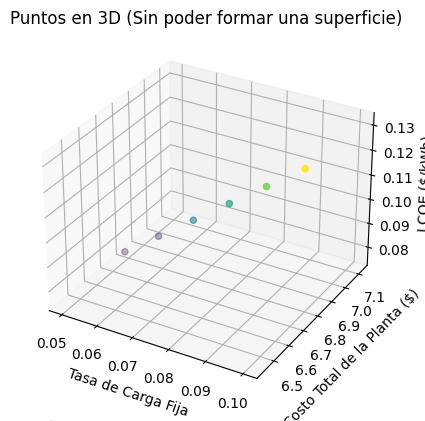

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Cargar los datos
data = pd.read_csv('/home/cparrado/UNAB/csp2/resultados_sensibilidad_fcr.csv')

tasa_carga_fija = data['Tasa_carga_fija'].values
plant_costs = data['Costo_total_planta_$'].values
lcoe_values = data['LCOE_$'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos en 3D (será una línea ya que 'plant_costs' es constante)
ax.scatter(tasa_carga_fija, plant_costs, lcoe_values, c=lcoe_values, cmap='viridis')

ax.set_xlabel('Tasa de Carga Fija')
ax.set_ylabel('Costo Total de la Planta ($)')
ax.set_zlabel('LCOE ($/kWh)')
ax.set_title('Puntos en 3D (Sin poder formar una superficie)')

plt.show()


In [ ]:
import PySAM.TcsmoltenSalt as TCSMS              # Importa el módulo para simular una planta CSP de sales fundidas
import PySAM.Lcoefcr as Lcoefcr                 # Importa el módulo para calcular el LCOE con tasa de carga fija
import pandas as pd                             # Importa pandas para manejar datos en tablas (DataFrames)

# Lista de diferentes tasas de carga fija (FCR) para el análisis de sensibilidad
fixed_charge_rates = [0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

# Establecer las horas de almacenamiento en 12
tshours = 12

# Crear listas vacías para guardar los resultados de cada simulación
energy_generation = []
plant_costs = []
lcoe_values = []

# Recorrer cada valor de FCR
for fcr in fixed_charge_rates:
    # Crear un modelo de planta CSP con el diseño por defecto
    csp_model = TCSMS.default("MSPTSingleOwner")

    # Datos del recurso solar (archivo con datos horarios)
    solar_resource_data = {
        "solar_resource_file": "/home/cparrado/UNAB/csp2/hourly_data_fixed.csv"
    }

    # Asignar el archivo de recursos solares al modelo CSP
    csp_model.SolarResource.assign(solar_resource_data)

    # Definir las horas de almacenamiento térmico
    system_design_data = {
        "tshours": tshours
    }

    # Asignar el diseño del sistema (horas de almacenamiento) al modelo
    csp_model.SystemDesign.assign(system_design_data)

    # Ejecutar la simulación de la planta CSP
    try:
        csp_model.execute()
        print(f"Simulación con {tshours} horas de almacenamiento y FCR={fcr} ejecutada con éxito")

        # Obtener la generación anual de energía y el costo total instalado desde la simulación
        annual_energy = csp_model.Outputs.annual_energy
        total_installed_cost = csp_model.Outputs.total_installed_cost

        # Guardar estos resultados en las listas correspondientes
        energy_generation.append(annual_energy)
        plant_costs.append(total_installed_cost)

        # Obtener la capacidad instalada de la planta
        plant_capacity = csp_model.Outputs.system_capacity
        print(f"Capacidad de la planta: {plant_capacity} kWe")

        # Crear un modelo para calcular el LCOE usando la tasa de carga fija
        lcoe_model = Lcoefcr.default("GenericCSPSystemLCOECalculator")

        # Asignar los datos necesarios al modelo LCOE
        lcoe_model.SimpleLCOE.annual_energy = annual_energy           # Energía anual generada (kWh)
        lcoe_model.SimpleLCOE.capital_cost = total_installed_cost     # Costo total de la planta ($)
        lcoe_model.SimpleLCOE.fixed_charge_rate = fcr                 # Tasa de carga fija
        lcoe_model.SimpleLCOE.fixed_operating_cost = 000000          # Costo operativo fijo anual ($)
        lcoe_model.SimpleLCOE.variable_operating_cost = 0.02          # Costo operativo variable ($/kWh)

        # Ejecutar el cálculo del LCOE
        lcoe_model.execute()

        # Guardar el valor de LCOE resultante
        lcoe = lcoe_model.Outputs.lcoe_fcr
        lcoe_values.append(lcoe)

    except Exception as e:
        # En caso de error en la simulación, mostrar mensaje y agregar valores nulos a las listas
        print(f"Error al ejecutar la simulación con {tshours} horas de almacenamiento y FCR={fcr}: {e}")
        energy_generation.append(None)
        plant_costs.append(None)
        lcoe_values.append(None)

# Crear un DataFrame con todos los resultados obtenidos
df_results = pd.DataFrame({
    'Tasa_carga_fija': fixed_charge_rates,
    'Generacion_energia_kWh': energy_generation,
    'Costo_total_planta_$': plant_costs,
    'LCOE_$': lcoe_values
})

# Guardar el DataFrame en un archivo CSV
output_csv = "/home/cparrado/UNAB/csp2/resultados_sensibilidad_fcr.csv"
df_results.to_csv(output_csv, index=False)

# Mostrar un mensaje indicando que se guardaron los resultados
print(f"Resultados de sensibilidad guardados en {output_csv}")
